In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np


df=pd.read_csv("final_table.csv")
df
print(df.columns)

Index(['Row_ID', 'Order_ID', 'Order_date', 'Quarter', 'Order_date _month',
       'Order_date _day', 'Order_date _year', 'Shipping_date',
       'Quarter_SHIPPING', 'Time_Frame', 'Ship_Mode', 'Ship_Mode_Rank',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'Region', 'State',
       'City', 'Postal_Code', 'Category', 'Sub_Category', 'Product_Name',
       'Product_ID', 'item_price', 'Quantity', 'Discount', 'Sales', 'Profit'],
      dtype='object')


<Axes: xlabel='Quantity', ylabel='Count'>

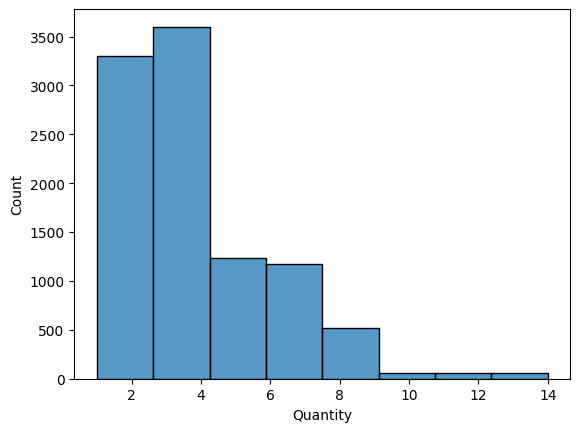

In [4]:
sns.histplot(df['Quantity'],bins=8)

In [37]:
mydata2=df.groupby(['Order_date _year'], as_index=False)[['Sales','Profit','Discount','Quantity']].sum()
mydata2

,Order_date _year,Sales,Profit,Discount,Quantity
0,2014,471609.0180,49543.9741,315.46,7581
1,2015,470532.5090,61618.6037,327.09,7979
2,2016,601705.6479,81795.1743,400.32,9837
3,2017,727515.3569,93439.2696,518.22,12476


In [81]:
print(mydata2.head())
print(mydata2.columns)

   Order_date _year        Sales      Profit  Discount  Quantity
0              2014  471609.0180  49543.9741    315.46      7581
1              2015  470532.5090  61618.6037    327.09      7979
2              2016  601705.6479  81795.1743    400.32      9837
3              2017  727515.3569  93439.2696    518.22     12476
Index(['Order_date _year', 'Sales', 'Profit', 'Discount', 'Quantity'], dtype='object')


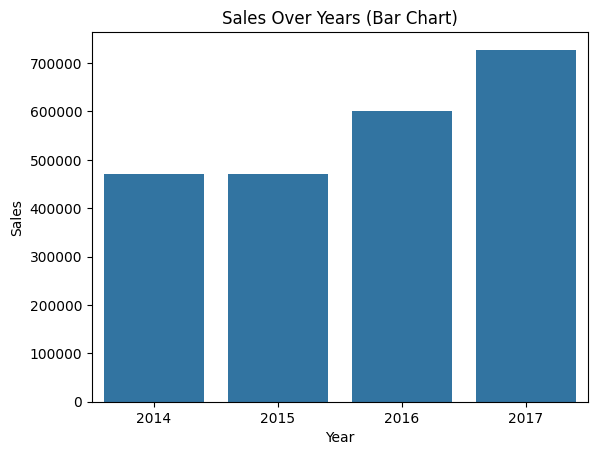

In [82]:
sns.barplot(x='Order_date _year', y='Sales', data=mydata2)
plt.title('Sales Over Years (Bar Chart)')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

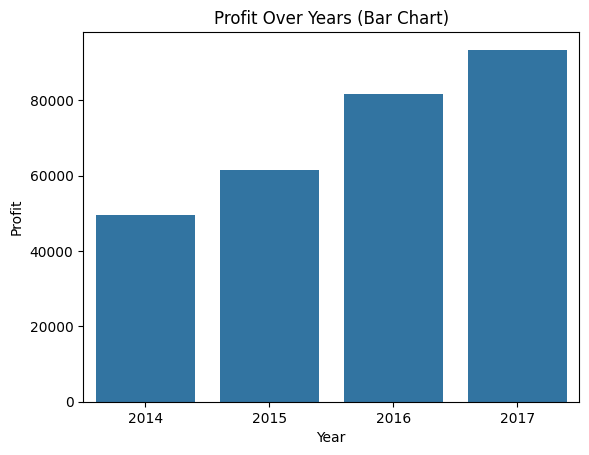

In [38]:
sns.barplot(x='Order_date _year', y='Profit', data=mydata2)
plt.title('Profit Over Years (Bar Chart)')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.show()

In [5]:
negative_profits = df.query('Profit <= 0')
losing_yrs_profits = negative_profits.groupby('Order_date _year')['Profit'].sum().reset_index()
topyrs_negative_profits = losing_yrs_profits.sort_values(by='Profit').head(10)
topyrs_negative_profits

,Order_date _year,Profit
3,2017,-53836.1934
2,2016,-37872.9297
1,2015,-32529.3909
0,2014,-31892.7717


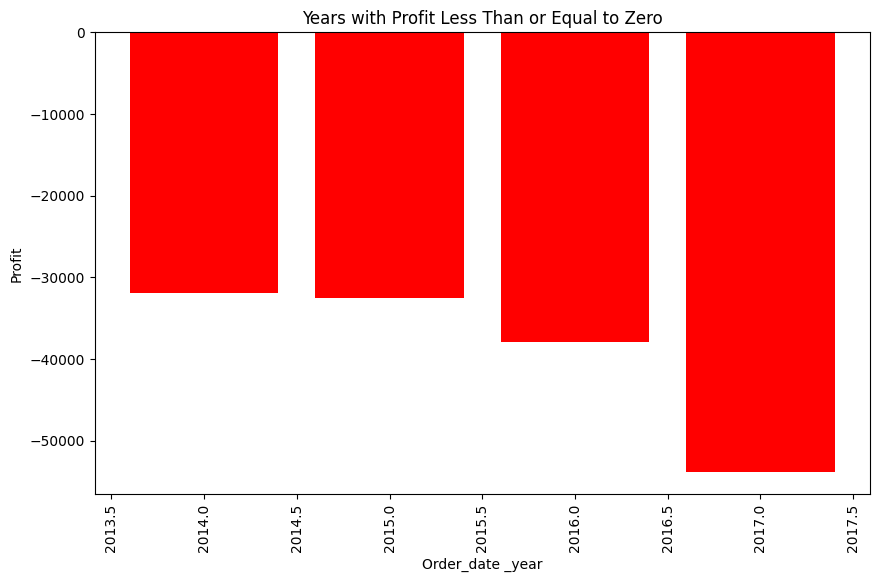

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(topyrs_negative_profits['Order_date _year'], topyrs_negative_profits['Profit'], color='red')
plt.xlabel('Order_date _year')
plt.ylabel('Profit')
plt.title('Years with Profit Less Than or Equal to Zero')
plt.xticks(rotation=90)
plt.show()

In [65]:
quarterly_sales = df.groupby('Quarter')['Sales'].sum().reset_index()
quarterly_sales

,Quarter,Sales
0,Q1,343043.1356
1,Q2,445509.6196
2,Q3,613932.1057
3,Q4,868877.6709


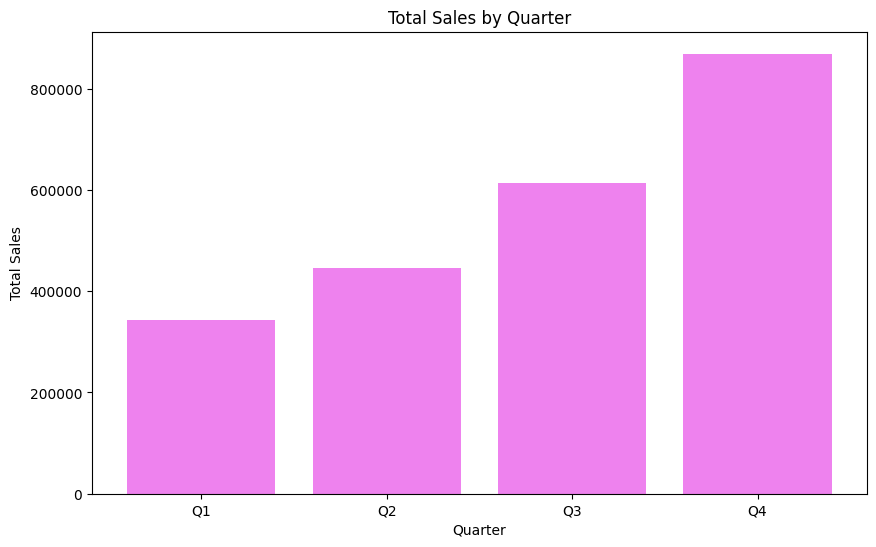

In [64]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(quarterly_sales['Quarter'], quarterly_sales['Sales'], color='violet')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.title('Total Sales by Quarter')

plt.show()


In [17]:
mydatas=df.groupby(['Ship_Mode'], as_index=False)[['Sales','Profit','Discount','Quantity']].sum()
mydatas

,Ship_Mode,Sales,Profit,Discount,Quantity
0,First Class,3.462285e+05,48969.8399,253.17,5693
1,Same Day,1.283631e+05,15891.7589,82.75,1960
2,Second Class,4.591936e+05,57446.6354,270.15,7423
3,Standard Class,1.337577e+06,164088.7875,955.02,22797


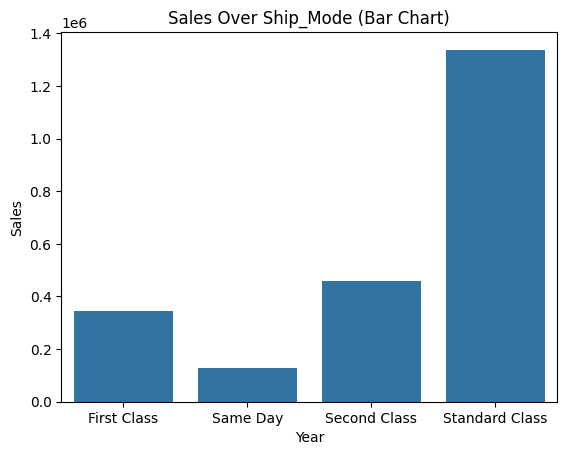

In [18]:
sns.barplot(x='Ship_Mode', y='Sales', data=mydatas)
plt.title('Sales Over Ship_Mode (Bar Chart)')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

In [29]:
ship_mode_counts = df.groupby(['Order_date _year', 'Ship_Mode']).size().reset_index(name='count')
ship_mode_counts

,Order_date _year,Ship_Mode,count
0,2014,First Class,291
1,2014,Same Day,90
2,2014,Second Class,381
3,2014,Standard Class,1231
4,2015,First Class,288
5,2015,Same Day,109
6,2015,Second Class,417
7,2015,Standard Class,1288
8,2016,First Class,387
9,2016,Same Day,158


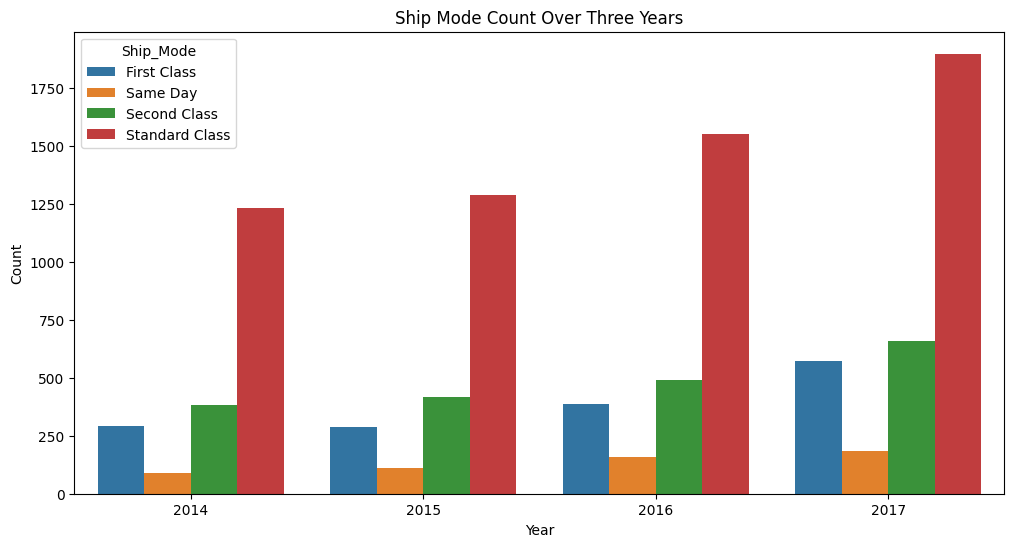

In [30]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(x='Order_date _year', y='count', hue='Ship_Mode', data=ship_mode_counts)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Ship Mode Count Over Three Years')

# Show the plot
plt.show()

In [40]:
# Assuming df is your DataFrame and it has columns 'Order_date _year', 'Regions', and 'Sales'
specific_year = 2017
df_specific_year = df[df['Order_date _year'] == specific_year]

# Group by 'Regions' and calculate the sum of 'Sales'
profit_per_region = df_specific_year.groupby('Region')['Profit'].sum().reset_index()

# Sort the DataFrame by 'Sales' in descending order
profit_per_region = profit_per_region.sort_values(by='Profit', ascending=False)

# Display the result
profit_per_region

,Region,Profit
3,West,43808.9561
1,East,33230.5614
2,South,8848.9079
0,Central,7550.8442


C:\Users\ramys\AppData\Local\Temp\ipykernel_6728\3476317734.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Profit', data=profit_per_region, palette='viridis')


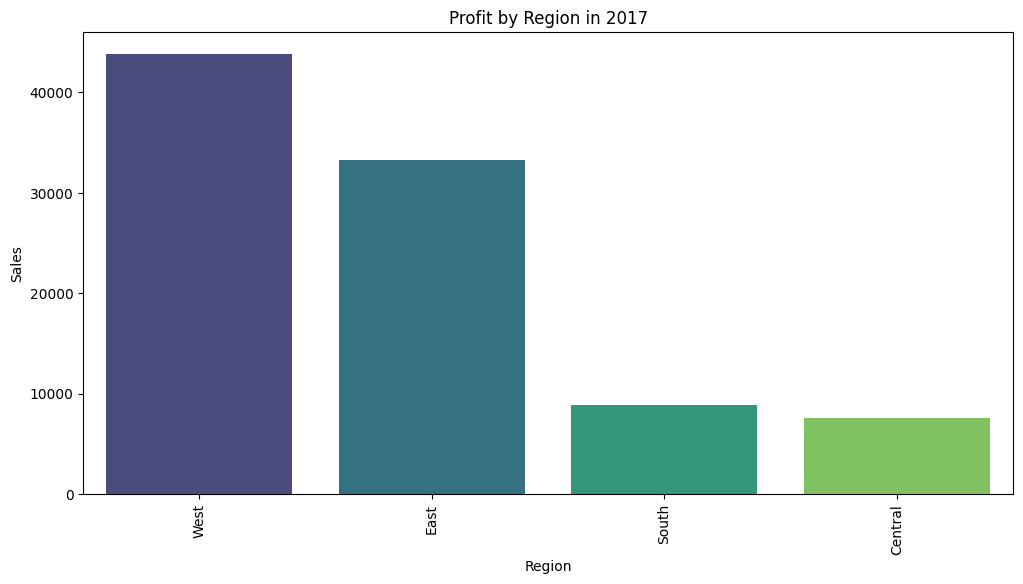

In [41]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(x='Region', y='Profit', data=profit_per_region, palette='viridis')

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Sales')
plt.title(f'Profit by Region in {specific_year}')
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [21]:
negative_profits = df.query('Profit <= 0')
losing_region_profits = negative_profits.groupby('Region')['Profit'].sum().reset_index()
topregion_negative_profits = losing_region_profits.sort_values(by='Profit')
topregion_negative_profits

,Region,Profit
0,Central,-56314.8850
1,East,-49590.6075
2,South,-27504.8323
3,West,-22720.9609


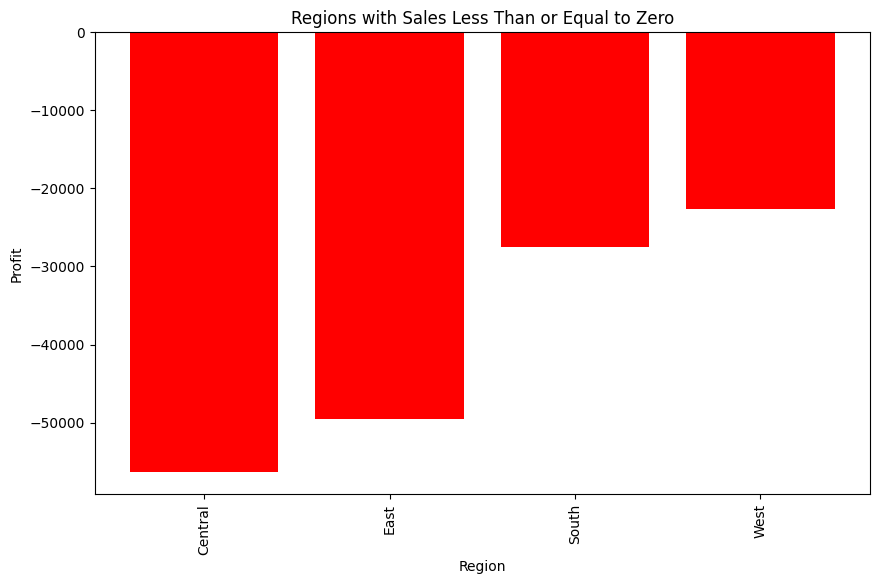

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(topregion_negative_profits['Region'], topregion_negative_profits['Profit'], color='red')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.title('Regions with Sales Less Than or Equal to Zero')
plt.xticks(rotation=90)
plt.show()

In [43]:
# Assuming df is your DataFrame and it has columns 'Order_date _year', 'State', and 'Sales'
specific_year = 2017
df_specific_year = df[df['Order_date _year'] == specific_year]

# Group by 'State' and calculate the sum of 'Sales'
profit_per_state = df_specific_year.groupby('State')['Profit'].sum().reset_index()

# Sort the DataFrame by 'Sales' in descending order
profit_per_state = profit_per_state.sort_values(by='Profit', ascending=False)

# Display the result
profit_per_state

,State,Profit
3,California,29366.4589
29,New York,24357.0717
44,Washington,17256.7798
19,Michigan,8487.7618
9,Georgia,6447.9819
6,Delaware,6053.2049
12,Indiana,5139.5257
15,Kentucky,4751.7214
17,Maryland,2780.6070
20,Minnesota,2459.8789


C:\Users\ramys\AppData\Local\Temp\ipykernel_6728\1209338844.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Profit', data=profit_per_state, palette='viridis')


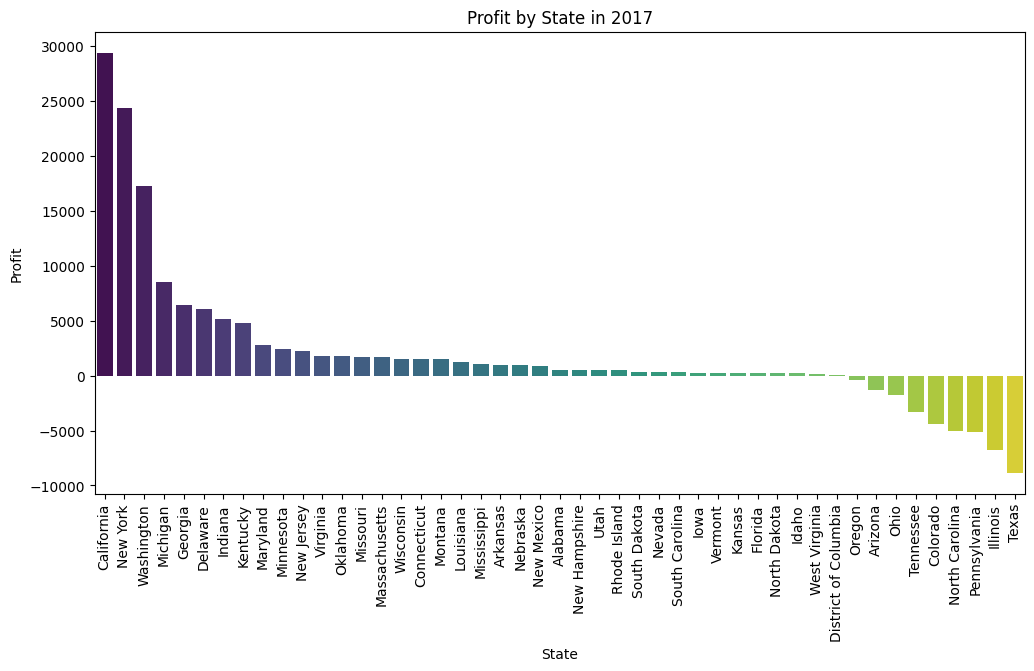

In [44]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(x='State', y='Profit', data=profit_per_state, palette='viridis')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Profit')
plt.title(f'Profit by State in {specific_year}')
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [45]:
# Assuming df is your DataFrame and it has columns 'Order_date _year', 'State', and 'Sales'
specific_year = 2017
df_specific_year = df[df['Order_date _year'] == specific_year]

# Group by 'State' and calculate the sum of 'Sales'
profit_per_state = df_specific_year.groupby('State')['Profit'].sum().reset_index()

# Sort the DataFrame by 'Sales' in descending order
profit_per_state = profit_per_state.sort_values(by='Profit', ascending=False).head(10)

# Display the result
profit_per_state

,State,Profit
3,California,29366.4589
29,New York,24357.0717
44,Washington,17256.7798
19,Michigan,8487.7618
9,Georgia,6447.9819
6,Delaware,6053.2049
12,Indiana,5139.5257
15,Kentucky,4751.7214
17,Maryland,2780.6070
20,Minnesota,2459.8789


C:\Users\ramys\AppData\Local\Temp\ipykernel_6728\1209338844.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Profit', data=profit_per_state, palette='viridis')


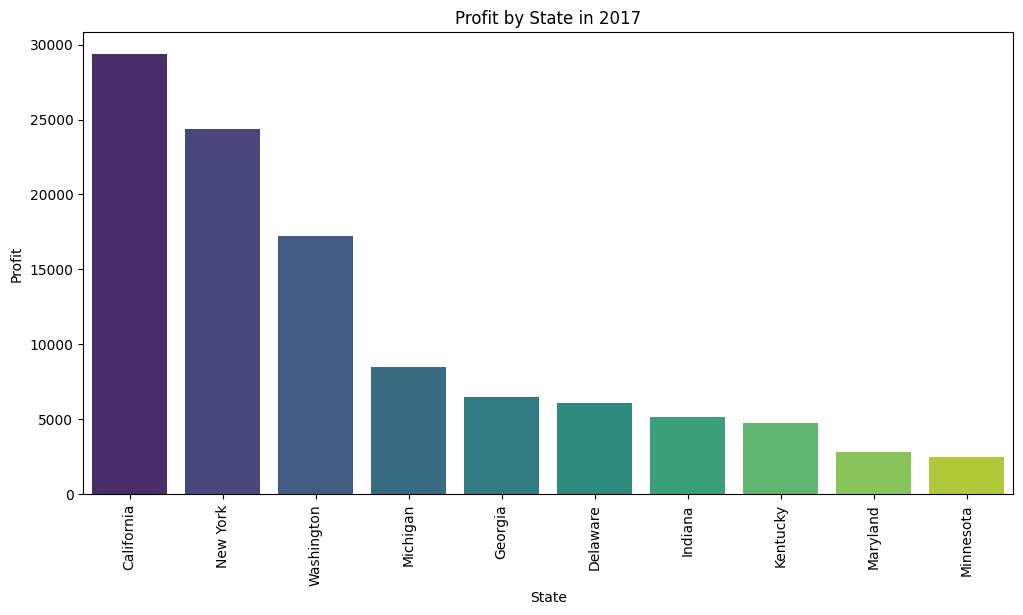

In [46]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(x='State', y='Profit', data=profit_per_state, palette='viridis')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Profit')
plt.title(f'Profit by State in {specific_year}')
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [9]:
negative_profits = df.query('Profit <= 0')
losing_State_profits = negative_profits.groupby('State')['Profit'].sum().reset_index()
topstate_negative_profits = losing_State_profits.sort_values(by='Profit').head(10)
topstate_negative_profits

,State,Profit
26,Texas,-36813.1875
21,Ohio,-21750.0002
23,Pennsylvania,-21602.8515
7,Illinois,-19501.6975
20,North Carolina,-11557.9854
3,Colorado,-8900.9048
6,Florida,-8689.8295
25,Tennessee,-7257.0174
1,Arizona,-6656.7675
19,New York,-5031.1378


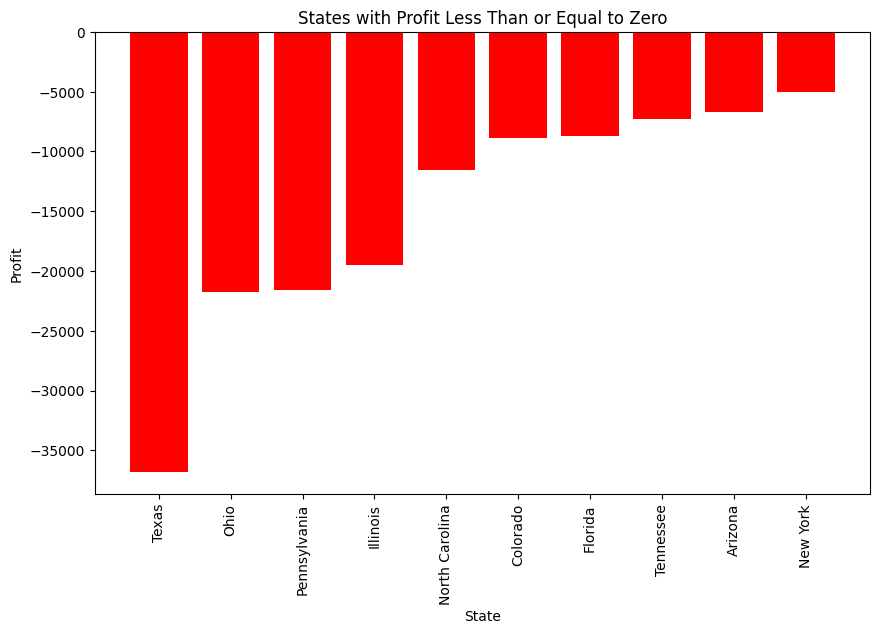

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(topstate_negative_profits['State'], topstate_negative_profits['Profit'], color='red')
plt.xlabel('State')
plt.ylabel('Profit')
plt.title('States with Profit Less Than or Equal to Zero')
plt.xticks(rotation=90)
plt.show()

In [47]:
# Assuming df is your DataFrame and it has columns 'Order_date _year', 'State', and 'Sales'
specific_year = 2017
df_specific_year = df[df['Order_date _year'] == specific_year]

# Group by 'State' and calculate the sum of 'Sales'
profit_per_city = df_specific_year.groupby('City')['Profit'].sum().reset_index()

# Sort the DataFrame by 'Sales' in descending order
top_cities = profit_per_city.sort_values(by='Profit', ascending=False).head(10)

# Display the result
top_cities



,City,Profit
215,New York City,22406.0271
299,Seattle,15518.6970
173,Los Angeles,10059.2901
290,San Francisco,6617.9550
216,Newark,5468.2674
140,Jackson,4520.9059
56,Columbus,3615.2543
75,Detroit,3417.3567
268,Richmond,2738.7960
11,Atlanta,2232.2704


C:\Users\ramys\AppData\Local\Temp\ipykernel_6728\974996956.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Profit', data=top_cities, palette='viridis')


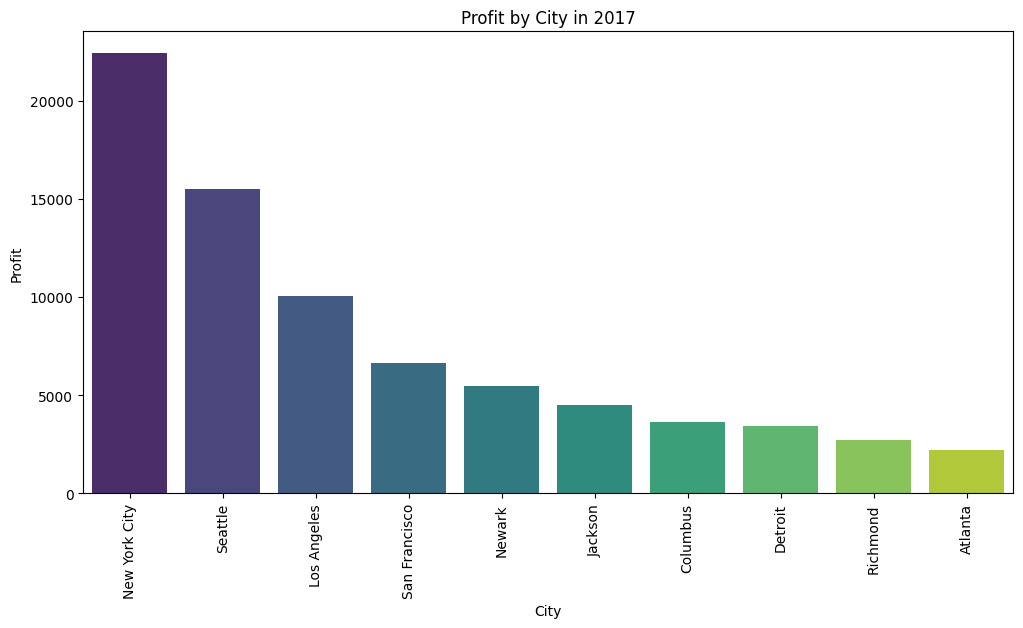

In [48]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(x='City', y='Profit', data=top_cities, palette='viridis')

# Add labels and title
plt.xlabel('City')
plt.ylabel('Profit')
plt.title(f'Profit by City in {specific_year}')
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [11]:
negative_profits = df.query('Profit <= 0')
losing_city_profits = negative_profits.groupby('City')['Profit'].sum().reset_index()
topcity_negative_profits = losing_city_profits.sort_values(by='Profit').head(10)
topcity_negative_profits

,City,Profit
178,Philadelphia,-19590.7411
109,Houston,-14785.3668
42,Chicago,-11120.6271
204,San Antonio,-7831.0254
121,Lancaster,-7632.4946
32,Burlington,-5999.3318
59,Dallas,-4208.5218
113,Jacksonville,-4059.9857
155,New York City,-3966.0226
130,Louisville,-3694.1045


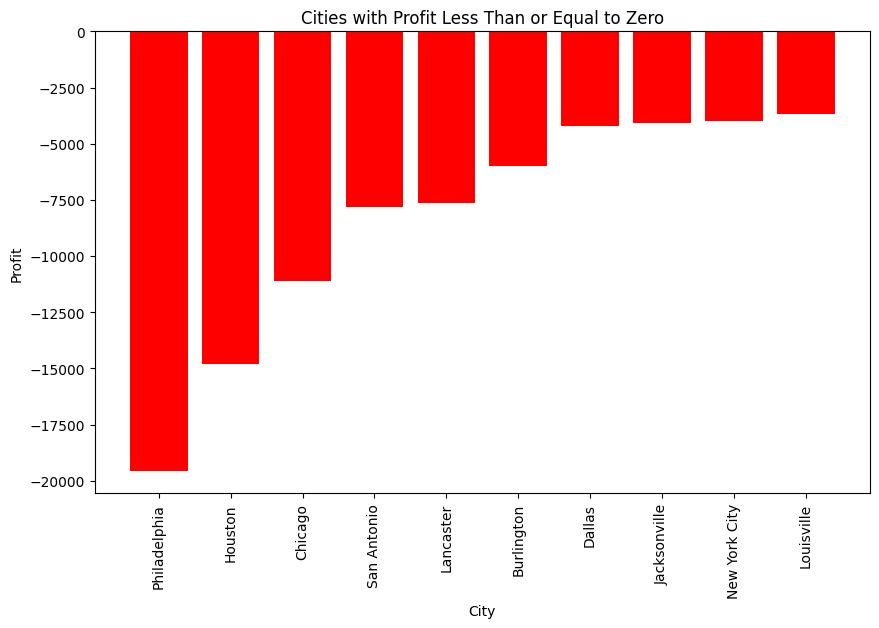

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(topcity_negative_profits['City'], topcity_negative_profits['Profit'], color='red')
plt.xlabel('City')
plt.ylabel('Profit')
plt.title('Cities with Profit Less Than or Equal to Zero')
plt.xticks(rotation=90)
plt.show()

In [16]:
# Assuming df is your DataFrame and it has columns 'Order_date _year', 'Segment', and 'Sales'
specific_year = 2017
df_specific_year = df[df['Order_date _year'] == specific_year]

# Group by 'Segment' and calculate the sum of 'Sales'
Profit_per_segment = df_specific_year.groupby('Segment')['Profit'].sum().reset_index()

# Sort the DataFrame by 'Profit' in descending order
Profit_per_segment = Profit_per_segment.sort_values(by='Profit', ascending=False)

# Display the result
Profit_per_segment

,Segment,Profit
0,Consumer,45568.2391
1,Corporate,26782.3633
2,Home Office,21088.6672


C:\Users\ramys\AppData\Local\Temp\ipykernel_13804\244994571.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Profit', data=Profit_per_segment, palette='viridis')


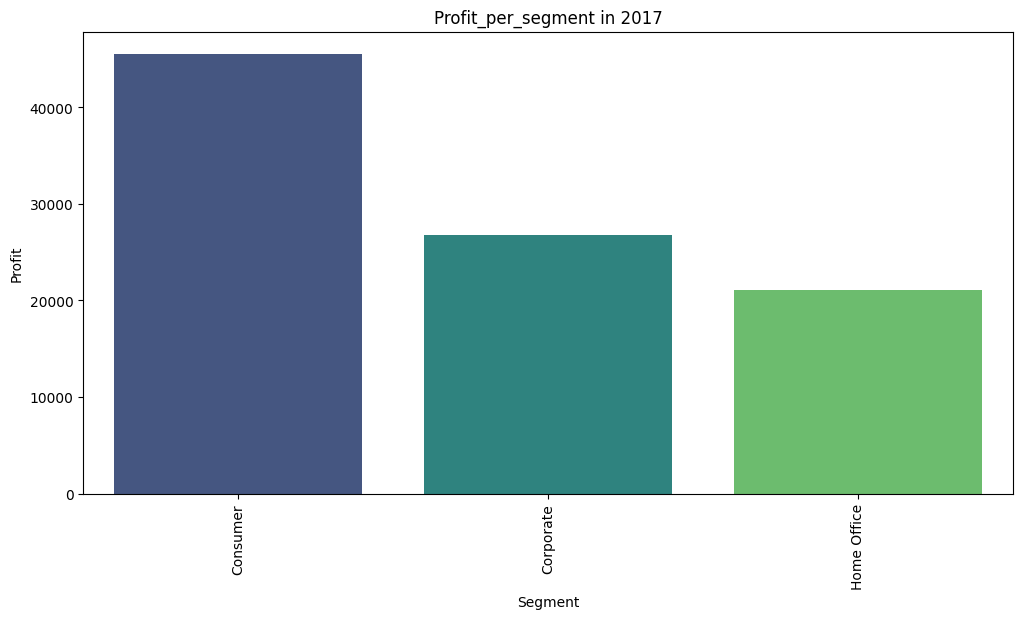

In [15]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(x='Segment', y='Profit', data=Profit_per_segment, palette='viridis')

# Add labels and title
plt.xlabel('Segment')
plt.ylabel('Profit')
plt.title(f'Profit_per_segment in {specific_year}')
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [17]:
negative_profits = df.query('Profit <= 0')
losing_seg_profits = negative_profits.groupby('Segment')['Profit'].sum().reset_index()
topseg_negative_profits = losing_seg_profits.sort_values(by='Profit').head(10)
topseg_negative_profits

,Segment,Profit
0,Consumer,-84945.7112
1,Corporate,-44787.2076
2,Home Office,-26398.3669


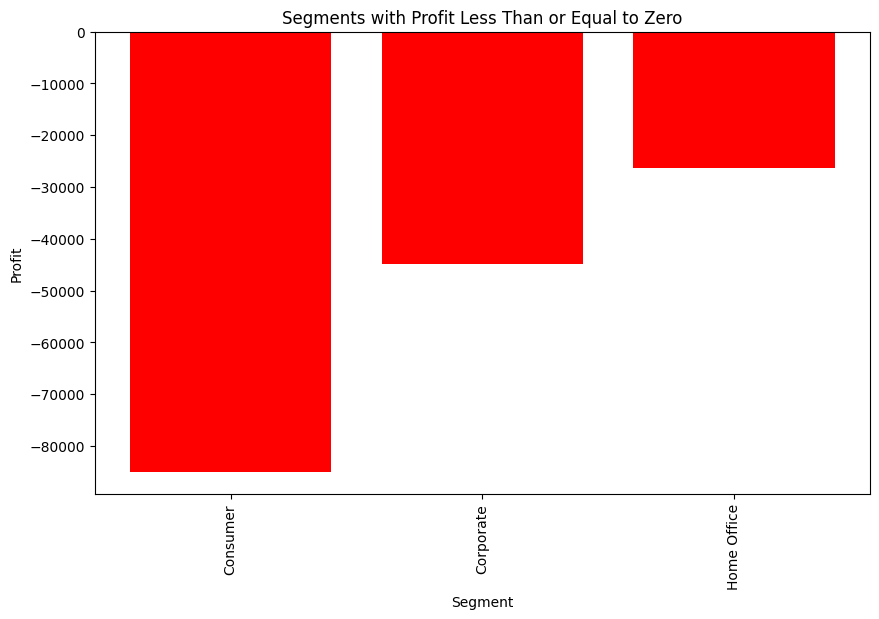

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(topseg_negative_profits['Segment'], topseg_negative_profits['Profit'], color='red')
plt.xlabel('Segment')
plt.ylabel('Profit')
plt.title('Segments with Profit Less Than or Equal to Zero')
plt.xticks(rotation=90)
plt.show()

In [19]:
# Assuming df is your DataFrame and it has columns 'Order_date _year', 'Customer', and 'Sales'
specific_year = 2017
df_specific_year = df[df['Order_date _year'] == specific_year]

# Group by 'Customer' and calculate the sum of 'Sales'
profit_per_customer = df_specific_year.groupby('Customer_Name')['Profit'].sum().reset_index()

# Sort and get top ten customers
top_customers = profit_per_customer.sort_values(by='Profit', ascending=False).head(10)

# Display the result
top_customers

,Customer_Name,Profit
542,Raymond Buch,6780.8963
298,Hunter Lopez,5045.8564
659,Tom Ashbrook,4599.2073
33,Andy Reiter,2607.6814
307,Jane Waco,1953.2680
291,Helen Wasserman,1946.6943
100,Brian Moss,1938.1873
10,Alan Dominguez,1866.9279
332,Jim Epp,1703.5561
622,Steven Roelle,1676.3122


C:\Users\ramys\AppData\Local\Temp\ipykernel_13804\2151872427.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer_Name', y='Profit', data=top_customers, palette='viridis')


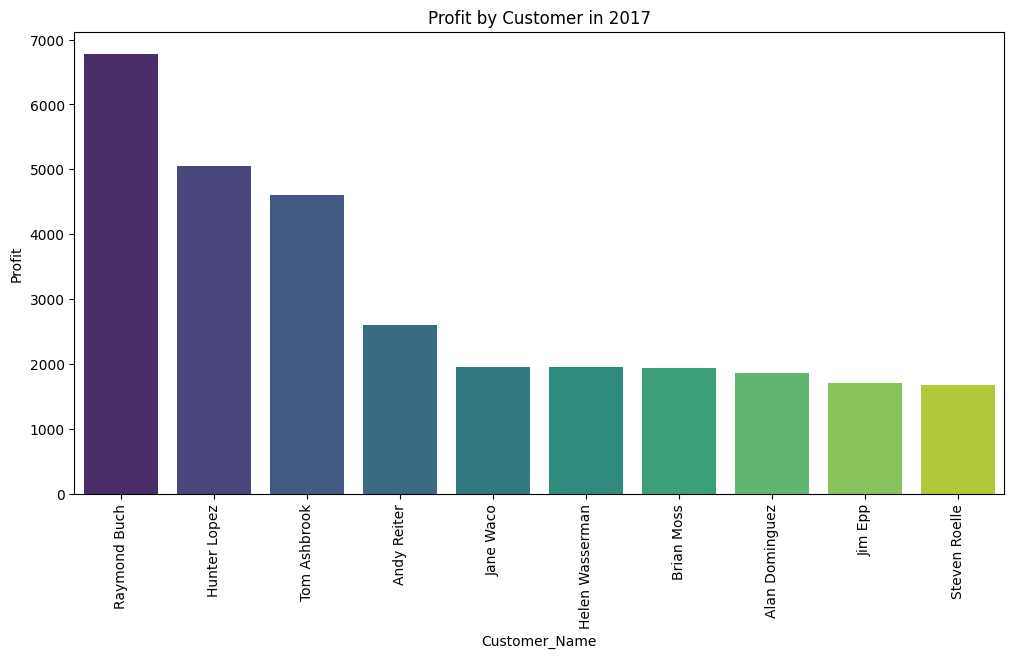

In [21]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(x='Customer_Name', y='Profit', data=top_customers, palette='viridis')

# Add labels and title
plt.xlabel('Customer_Name')
plt.ylabel('Profit')
plt.title(f'Profit by Customer in {specific_year}')
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [23]:
negative_profits = df.query('Profit <= 0')
losing_cust_profits = negative_profits.groupby('Customer_Name')['Profit'].sum().reset_index()
topcust_negative_profits = losing_cust_profits.sort_values(by='Profit').head(10)
topcust_negative_profits

,Customer_Name,Profit
128,Cindy Stewart,-6904.3700
249,Grant Thornton,-4187.1078
389,Luke Foster,-3805.5490
571,Sharelle Roach,-3467.1258
268,Henry Goldwyn,-2998.8345
462,Natalie Fritzler,-2833.4696
464,Nathan Cano,-2342.6546
562,Sean Braxton,-2279.3647
119,Christine Phan,-2191.5504
650,Zuschuss Carroll,-2130.2964


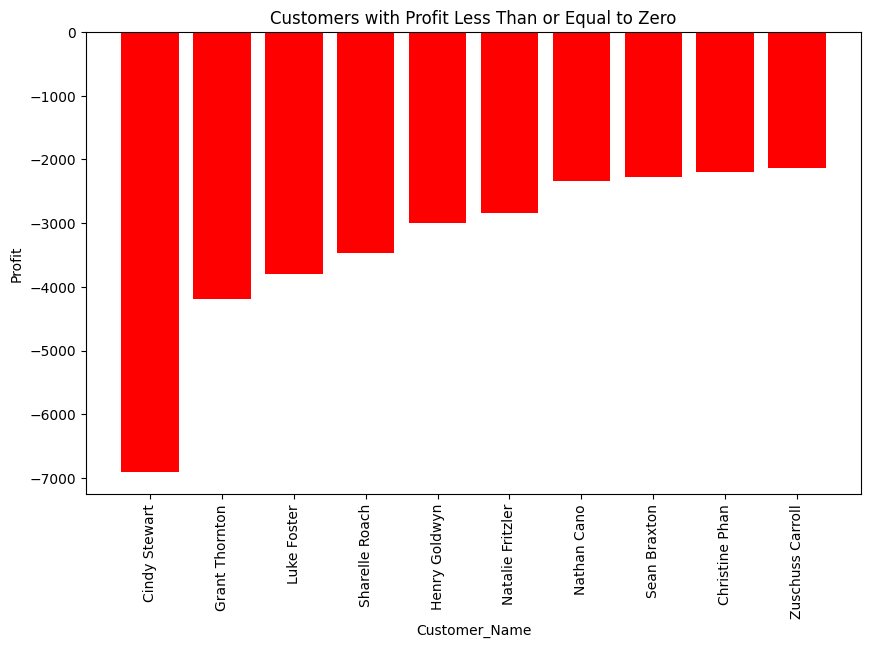

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(topcust_negative_profits['Customer_Name'], topcust_negative_profits['Profit'], color='red')
plt.xlabel('Customer_Name')
plt.ylabel('Profit')
plt.title('Customers with Profit Less Than or Equal to Zero')
plt.xticks(rotation=90)
plt.show()

In [25]:
# Assuming df is your DataFrame and it has columns 'Order_date _year', 'Category', and 'Sales'
specific_year = 2017
df_specific_year = df[df['Order_date _year'] == specific_year]

# Group by 'Category' and calculate the sum of 'Sales'
profit_per_category = df_specific_year.groupby('Category')['Profit'].sum().reset_index()

# Sort the DataFrame by 'Sales' in descending order
profit_per_category = profit_per_category.sort_values(by='Profit', ascending=False)

# Display the result
profit_per_category

,Category,Profit
2,Technology,50684.2566
1,Office Supplies,39736.6217
0,Furniture,3018.3913


C:\Users\ramys\AppData\Local\Temp\ipykernel_13804\2852513369.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Profit', data=profit_per_category, palette='viridis')


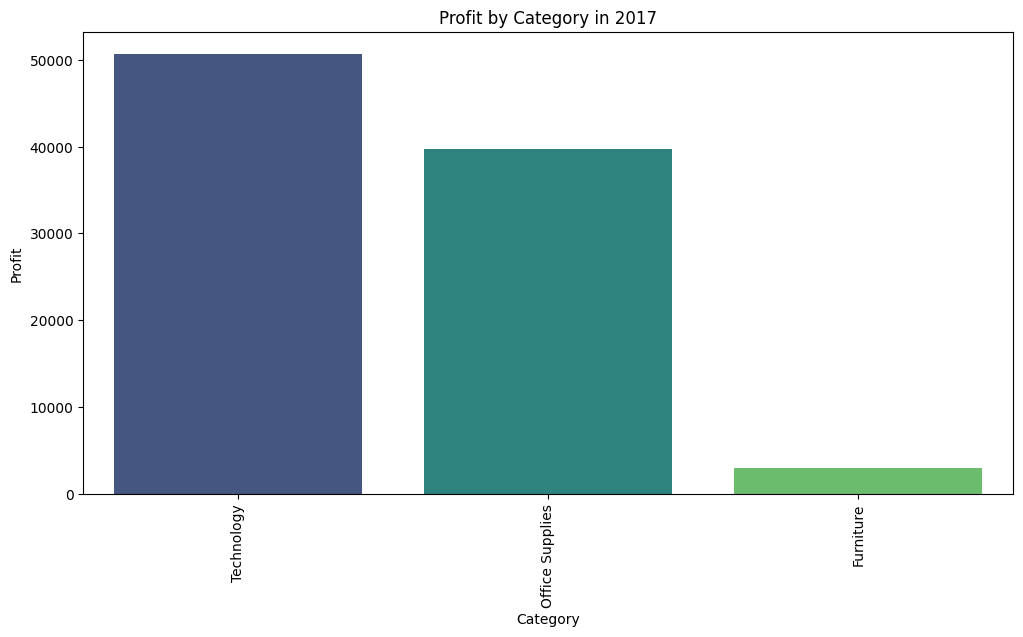

In [26]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(x='Category', y='Profit', data=profit_per_category, palette='viridis')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Profit')
plt.title(f'Profit by Category in {specific_year}')
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [27]:
negative_profits = df.query('Profit <= 0')
losing_categ_profits = negative_profits.groupby('Category')['Profit'].sum().reset_index()
topcat_negative_profits = losing_categ_profits.sort_values(by='Profit').head(10)
topcat_negative_profits

,Category,Profit
0,Furniture,-60936.1090
1,Office Supplies,-56615.2585
2,Technology,-38579.9182


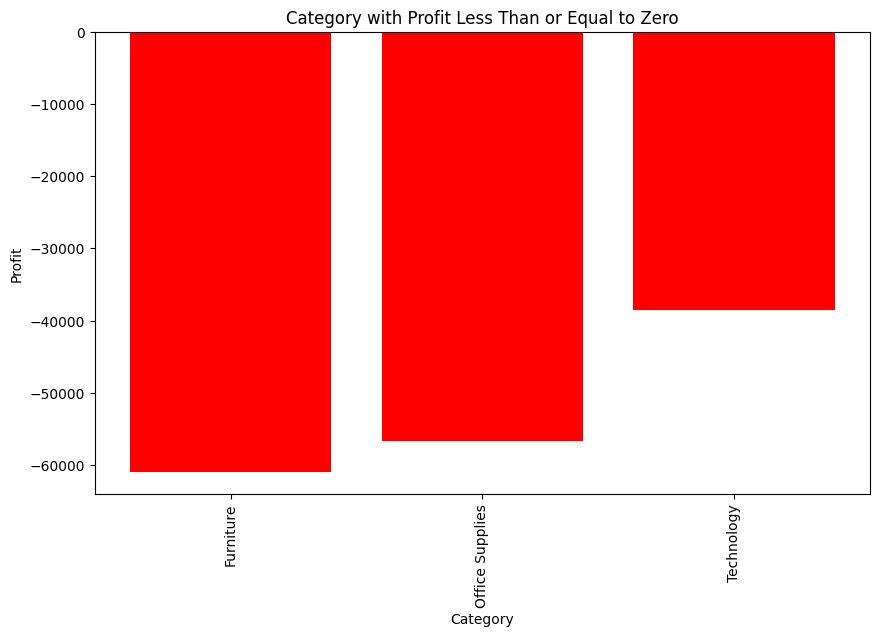

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(topcat_negative_profits['Category'], topcat_negative_profits['Profit'], color='red')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.title('Category with Profit Less Than or Equal to Zero')
plt.xticks(rotation=90)
plt.show()

In [29]:
# Assuming df is your DataFrame and it has columns 'Order_date _year', 'Sub_Category', and 'Profit'
specific_year = 2017
df_specific_year = df[df['Order_date _year'] == specific_year]

# Group by 'Sub_Category' and calculate the sum of 'Sales'
profit_per_sub_category = df_specific_year.groupby('Sub_Category')['Profit'].sum().reset_index()

# Sort the DataFrame by 'Sales' in descending order
profit_per_sub_category = profit_per_sub_category.sort_values(by='Profit', ascending=False)

# Display the result
profit_per_sub_category

,Sub_Category,Profit
6,Copiers,25031.7902
0,Accessories,15672.3570
13,Phones,12849.3250
12,Paper,12040.8434
1,Appliances,7865.2683
3,Binders,7669.7418
5,Chairs,7643.5493
14,Storage,7402.8007
9,Furnishings,4099.1628
2,Art,2221.9631


C:\Users\ramys\AppData\Local\Temp\ipykernel_13804\2444977303.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sub_Category', y='Profit', data=profit_per_sub_category, palette='viridis')


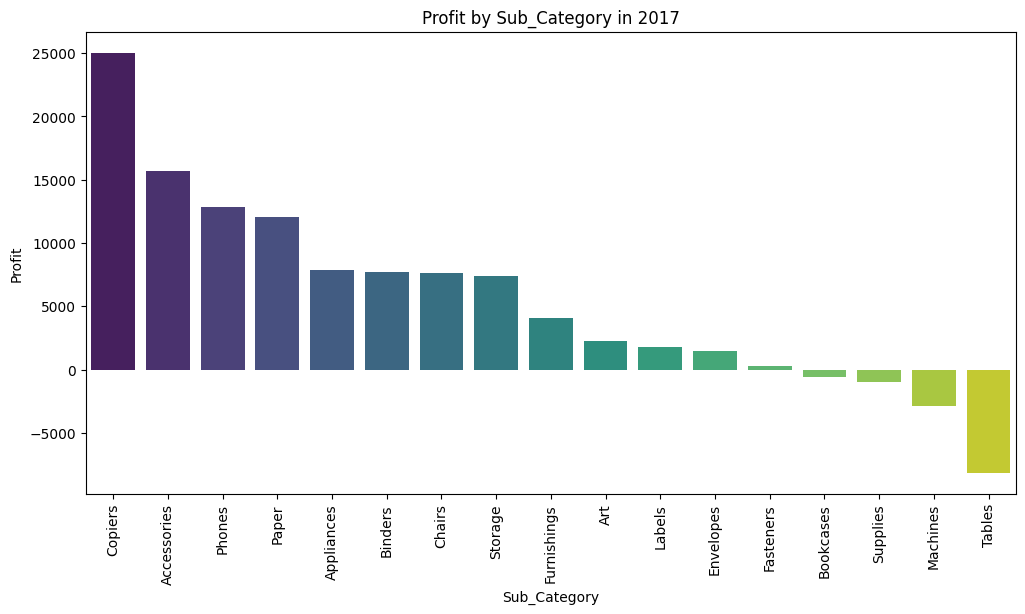

In [30]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(x='Sub_Category', y='Profit', data=profit_per_sub_category, palette='viridis')

# Add labels and title
plt.xlabel('Sub_Category')
plt.ylabel('Profit')
plt.title(f'Profit by Sub_Category in {specific_year}')
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [31]:
negative_profits = df.query('Profit <= 0')
losing_Subcateg_profits = negative_profits.groupby('Sub_Category')['Profit'].sum().reset_index()
topsubcat_negative_profits = losing_Subcateg_profits.sort_values(by='Profit').head(10)
topsubcat_negative_profits

,Sub_Category,Profit
2,Binders,-38510.4964
11,Tables,-32412.1483
7,Machines,-30118.6682
3,Bookcases,-12152.2060
4,Chairs,-9880.8413
1,Appliances,-8629.6412
8,Phones,-7530.6235
6,Furnishings,-6490.9134
9,Storage,-6426.3038
10,Supplies,-3015.6219


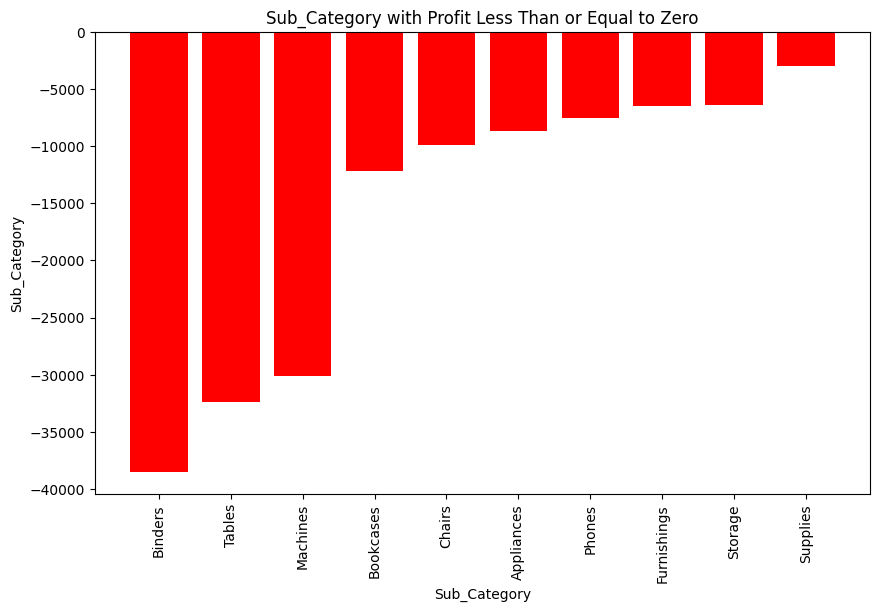

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(topsubcat_negative_profits['Sub_Category'], topsubcat_negative_profits['Profit'], color='red')
plt.xlabel('Sub_Category')
plt.ylabel('Sub_Category')
plt.title('Sub_Category with Profit Less Than or Equal to Zero')
plt.xticks(rotation=90)
plt.show()

In [35]:
# Assuming df is your DataFrame and it has columns 'Order_date _year', 'product', and 'Sales'
specific_year = 2017
df_specific_year = df[df['Order_date _year'] == specific_year]

# Group by 'Sub_Category' and calculate the sum of 'Sales'
profit_per_product = df_specific_year.groupby('Product_Name')['Profit'].sum().reset_index()
# Sort and get top ten products
top_products = profit_per_product.sort_values(by='Profit', ascending=False).head(10)

# Display the result
top_products

,Product_Name,Profit
336,Canon imageCLASS 2200 Advanced Copier,15679.9552
665,Hewlett Packard LaserJet 3310 Copier,3623.9396
565,GBC DocuBind TL300 Electric Binding System,1910.5887
533,Fellowes PB300 Plastic Comb Binding Machine,1753.7148
332,Canon Image Class D660 Copier,1691.9718
333,Canon Imageclass D680 Copier / Fax,1679.9760
668,Hewlett-Packard Desktjet 6988DT Refurbished Pr...,1668.2050
816,Logitech G19 Programmable Gaming Keyboard,1493.3574
1126,Samsung Galaxy Mega 6.3,1469.9650
18,"3D Systems Cube Printer, 2nd Generation, Magenta",1351.9896


C:\Users\ramys\AppData\Local\Temp\ipykernel_13804\3481516478.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product_Name', y='Profit', data=top_products, palette='viridis')


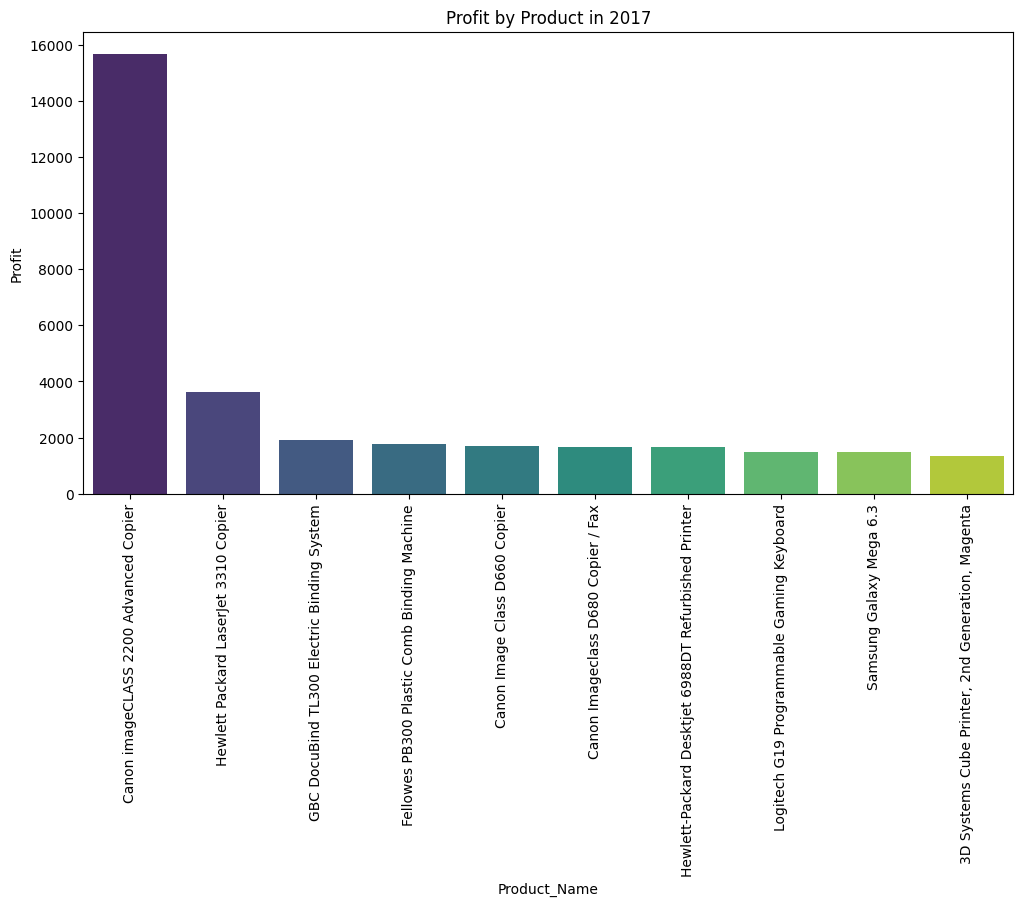

In [36]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(x='Product_Name', y='Profit', data=top_products, palette='viridis')

# Add labels and title
plt.xlabel('Product_Name')
plt.ylabel('Profit')
plt.title(f'Profit by Product in {specific_year}')
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [23]:
negative_profits = df.query('Profit <= 0')
losing_product_profits = negative_profits.groupby('Product_Name')['Profit'].sum().reset_index()
product_negative_profits = losing_product_profits.sort_values(by='Profit')
product_negative_profits

,Product_Name,Profit
199,Cubify CubeX 3D Printer Double Head Print,-9239.9692
304,GBC DocuBind P400 Electric Binding System,-6859.3896
495,Lexmark MX611dhe Monochrome Laser Printer,-5269.9690
309,GBC Ibimaster 500 Manual ProClick Binding System,-5098.5660
307,GBC DocuBind TL300 Electric Binding System,-4162.0336
...,...,...
660,"Sauder Facets Collection Locker/File Cabinet, ...",0.0000
111,Belkin OmniView SE Rackmount Kit,0.0000
641,"Safco Value Mate Steel Bookcase, Baked Enamel ...",0.0000
699,"Tenex 46"" x 60"" Computer Anti-Static Chairmat,...",0.0000


In [37]:
negative_profits = df.query('Profit <= 0')
losing_product_profits = negative_profits.groupby('Product_Name')['Profit'].sum().reset_index()
top_negative_profits = losing_product_profits.sort_values(by='Profit').head(10)
top_negative_profits


,Product_Name,Profit
199,Cubify CubeX 3D Printer Double Head Print,-9239.9692
304,GBC DocuBind P400 Electric Binding System,-6859.3896
495,Lexmark MX611dhe Monochrome Laser Printer,-5269.9690
309,GBC Ibimaster 500 Manual ProClick Binding System,-5098.5660
307,GBC DocuBind TL300 Electric Binding System,-4162.0336
200,Cubify CubeX 3D Printer Triple Head Print,-3839.9904
282,Fellowes PB500 Electric Punch Plastic Comb Bin...,-3431.6730
172,Chromcraft Bull-Nose Wood Oval Conference Tabl...,-3107.5272
452,Ibico EPK-21 Electric Binding System,-2929.4845
139,Bush Advantage Collection Racetrack Conference...,-2545.2600


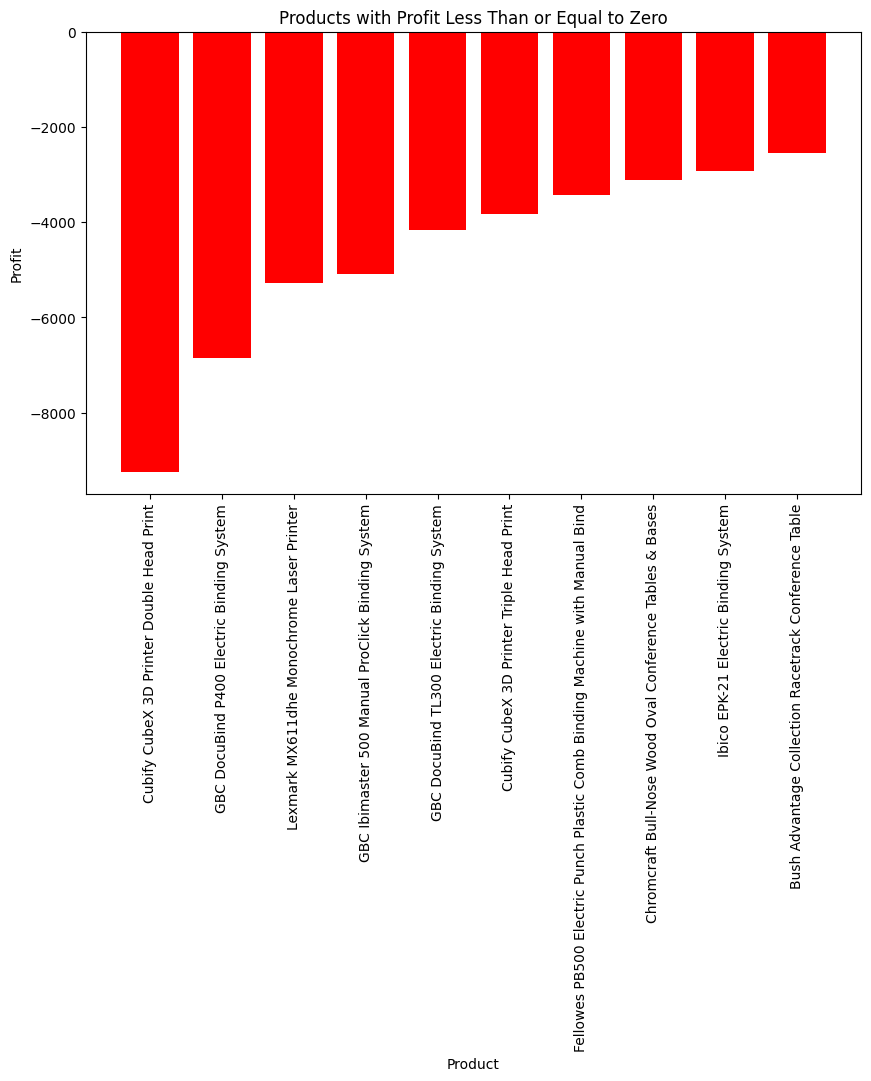

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(top_negative_profits['Product_Name'], top_negative_profits['Profit'], color='red')
plt.xlabel('Product')
plt.ylabel('Profit')
plt.title('Products with Profit Less Than or Equal to Zero')
plt.xticks(rotation=90)
plt.show()

In [42]:
df.describe()

,Row_ID,Order_date _month,Order_date _day,Order_date _year,Time_Frame,Ship_Mode_Rank,Postal_Code,item_price,Quantity,Discount,Sales,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,7.809686,15.468481,2015.722233,3.958175,3.334601,55190.379428,74.845245,3.789574,0.156203,227.272617,28.656896
std,2885.163629,3.284654,8.748327,1.123555,1.747567,0.925478,32063.693350,171.582405,2.225110,0.206452,560.821012,234.260108
min,1.000000,1.000000,1.000000,2014.000000,0.000000,1.000000,1040.000000,0.990000,1.000000,0.000000,0.444000,-6599.978000
25%,2499.250000,5.000000,8.000000,2015.000000,3.000000,3.000000,23223.000000,6.480000,2.000000,0.000000,17.280000,1.728750
50%,4997.500000,9.000000,15.000000,2016.000000,4.000000,4.000000,56430.500000,19.980000,3.000000,0.200000,54.490000,8.666500
75%,7495.750000,11.000000,23.000000,2017.000000,5.000000,4.000000,90008.000000,76.980000,5.000000,0.200000,209.940000,29.364000
max,9994.000000,12.000000,31.000000,2017.000000,7.000000,4.000000,99301.000000,3999.990000,14.000000,0.800000,9999.999900,8399.976000


In [14]:
# Assuming df is your original DataFrame and it has columns 'Order_date _year', 'Product_Name', 'Profit', and 'item_price'
specific_year = 2017
df_specific_year = df[df['Order_date _year'] == specific_year]

# Group by 'Product_Name' and calculate the sum of 'Profit'
sales_per_product = df_specific_year.groupby('Product_Name')['Sales'].sum().reset_index()

# Sort and get top ten products
top_products = sales_per_product.sort_values(by='Sales', ascending=False).head(10)

# Merge to get item_price for the top products
top_products_with_price = top_products.merge(df[['Product_Name', 'item_price','Quantity','Discount']], on='Product_Name', how='left').drop_duplicates()

# Display the result
top_products_with_price

,Product_Name,Sales,item_price,Quantity,Discount
0,Canon imageCLASS 2200 Advanced Copier,29999.9997,3125.00,4,0.2
1,Canon imageCLASS 2200 Advanced Copier,29999.9997,3333.33,3,0.0
2,Canon imageCLASS 2200 Advanced Copier,29999.9997,3499.99,4,0.4
3,Canon imageCLASS 2200 Advanced Copier,29999.9997,2000.00,5,0.0
4,Canon imageCLASS 2200 Advanced Copier,29999.9997,2500.00,4,0.0
5,Martin Yale Chadless Opener Electric Letter Op...,11825.9020,832.81,1,0.2
6,Martin Yale Chadless Opener Electric Letter Op...,11825.9020,832.81,7,0.2
7,Martin Yale Chadless Opener Electric Letter Op...,11825.9020,832.81,5,0.0
8,Martin Yale Chadless Opener Electric Letter Op...,11825.9020,832.81,2,0.0
9,Martin Yale Chadless Opener Electric Letter Op...,11825.9020,832.81,2,0.2


In [15]:
# Assuming df is your original DataFrame and it has columns 'Order_date _year', 'Product_Name', 'Profit', and 'item_price'
specific_year = 2017
df_specific_year = df[df['Order_date _year'] == specific_year]

# Group by 'Product_Name' and calculate the sum of 'Profit'
sales_per_product = df_specific_year.groupby('Product_Name')['Sales'].sum().reset_index()

# Sort and get top ten products
top_products = sales_per_product.sort_values(by='Sales', ascending=False).head(10)

# Merge to get item_price for the top products
top_products_with_Details = top_products.merge(df[['Product_Name','Ship_Mode_Rank','Time_Frame']], on='Product_Name', how='left').drop_duplicates()

# Display the result
top_products_with_Details

,Product_Name,Sales,Ship_Mode_Rank,Time_Frame
0,Canon imageCLASS 2200 Advanced Copier,29999.9997,2,2
1,Canon imageCLASS 2200 Advanced Copier,29999.9997,4,5
2,Canon imageCLASS 2200 Advanced Copier,29999.9997,4,4
3,Canon imageCLASS 2200 Advanced Copier,29999.9997,4,7
5,Martin Yale Chadless Opener Electric Letter Op...,11825.9020,4,4
6,Martin Yale Chadless Opener Electric Letter Op...,11825.9020,3,4
8,Martin Yale Chadless Opener Electric Letter Op...,11825.9020,2,2
9,Martin Yale Chadless Opener Electric Letter Op...,11825.9020,4,7
10,Martin Yale Chadless Opener Electric Letter Op...,11825.9020,3,5
11,GBC DocuBind TL300 Electric Binding System,10943.2780,2,3


In [54]:
# Calculate the correlation
correlation = df[['Sales', 'item_price']].corr()
correlation



,Sales,item_price
Sales,1.000000,0.829405
item_price,0.829405,1.000000


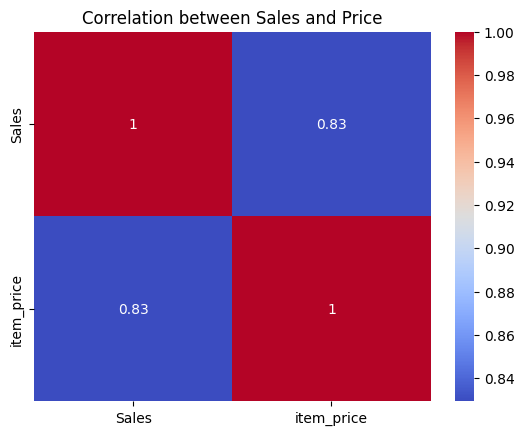

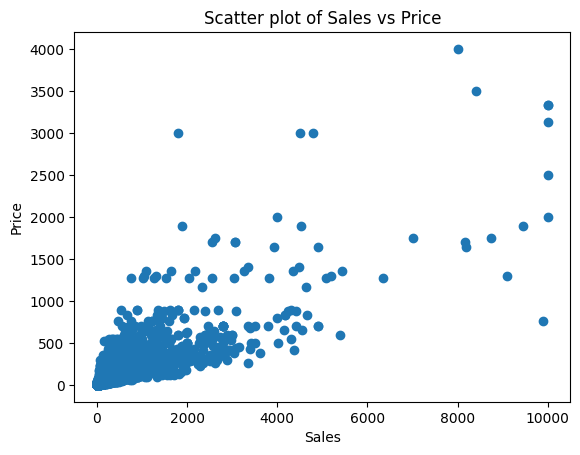

In [55]:
# Visualize the correlation using a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Sales and Price')
plt.show()

# Visualize the relationship using a scatter plot
plt.scatter(df['Sales'], df['item_price'])
plt.xlabel('Sales')
plt.ylabel('Price')
plt.title('Scatter plot of Sales vs Price')
plt.show()

In [4]:
# Calculate the correlation
correlation = df[['Sales', 'Quantity']].corr()
correlation

,Sales,Quantity
Sales,1.000000,0.220121
Quantity,0.220121,1.000000


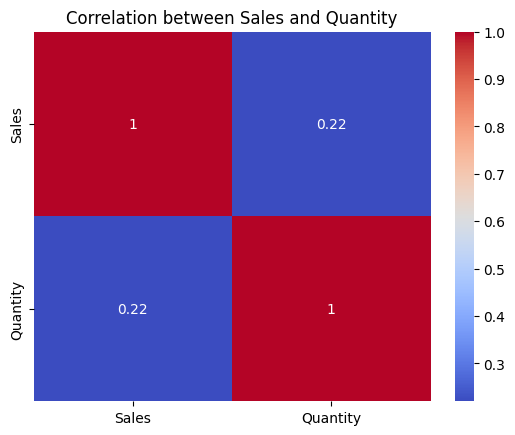

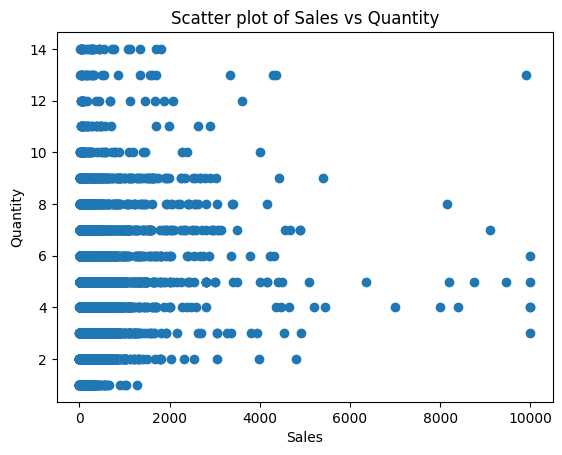

In [6]:
# Visualize the correlation using a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Sales and Quantity')
plt.show()

# Visualize the relationship using a scatter plot
plt.scatter(df['Sales'], df['Quantity'])
plt.xlabel('Sales')
plt.ylabel('Quantity')
plt.title('Scatter plot of Sales vs Quantity')
plt.show()

In [17]:
# Calculate the correlation
correlation = df[['Sales', 'Discount']].corr()
correlation

,Sales,Discount
Sales,1.000000,-0.033509
Discount,-0.033509,1.000000


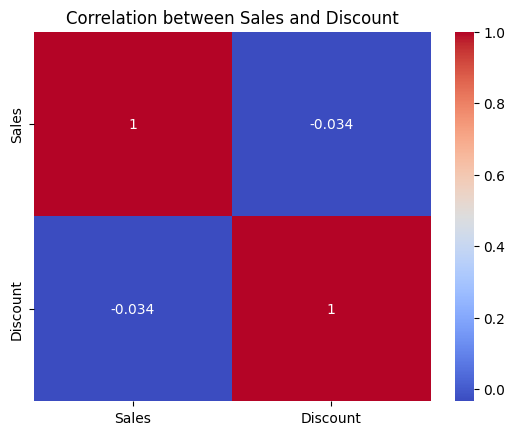

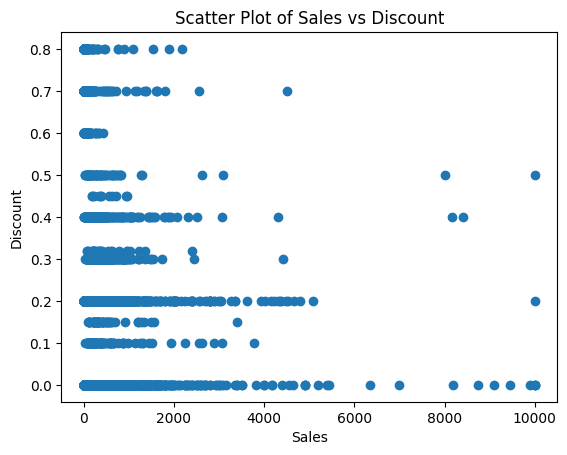

In [18]:
# Visualize the correlation using a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Sales and Discount')
plt.show()

# Visualize the relationship using a scatter plot
plt.scatter(df['Sales'], df['Discount'])
plt.xlabel('Sales')
plt.ylabel('Discount')
plt.title('Scatter Plot of Sales vs Discount')
plt.show()

In [20]:
# Calculate the correlation
correlation = df[['Sales', 'Ship_Mode_Rank']].corr()
correlation

,Sales,Ship_Mode_Rank
Sales,1.000000,-0.004893
Ship_Mode_Rank,-0.004893,1.000000


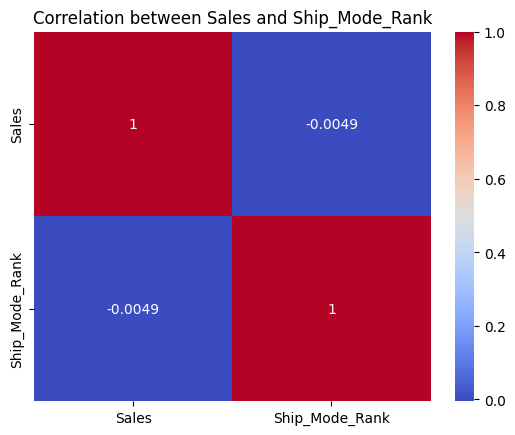

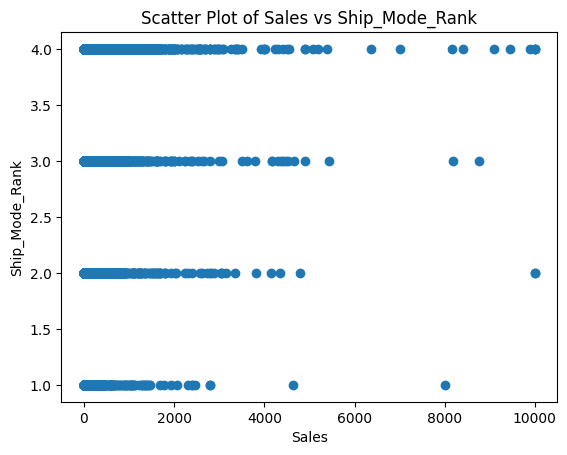

In [22]:
# Visualize the correlation using a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Sales and Ship_Mode_Rank')
plt.show()

# Visualize the relationship using a scatter plot
plt.scatter(df['Sales'], df['Ship_Mode_Rank'])
plt.xlabel('Sales')
plt.ylabel('Ship_Mode_Rank')
plt.title('Scatter Plot of Sales vs Ship_Mode_Rank')
plt.show()

In [23]:
ship_mode_counts = df.groupby(['Order_date _year', 'Ship_Mode']).size().reset_index(name='count')
ship_mode_counts

,Order_date _year,Ship_Mode,count
0,2014,First Class,291
1,2014,Same Day,90
2,2014,Second Class,381
3,2014,Standard Class,1231
4,2015,First Class,288
5,2015,Same Day,109
6,2015,Second Class,417
7,2015,Standard Class,1288
8,2016,First Class,387
9,2016,Same Day,158


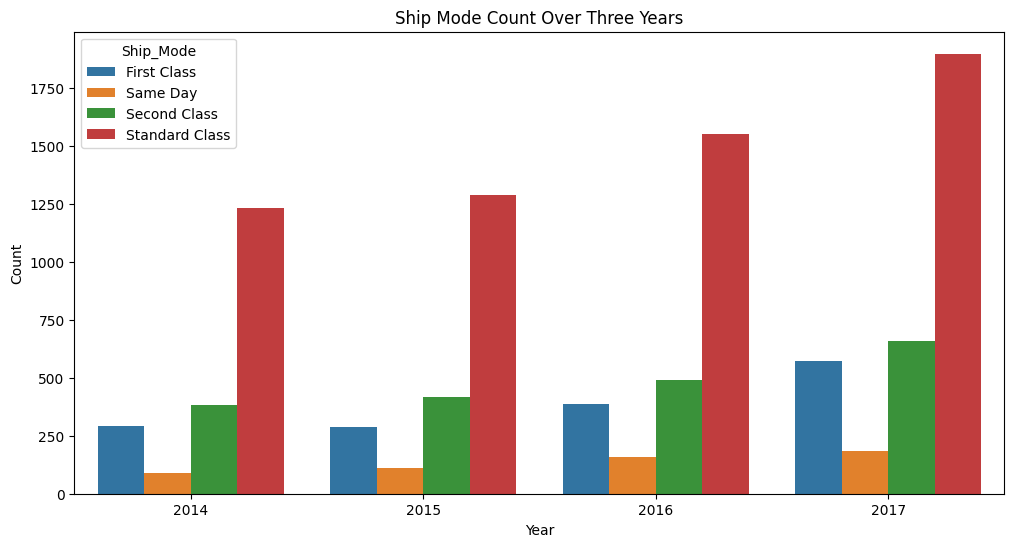

In [24]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(x='Order_date _year', y='count', hue='Ship_Mode', data=ship_mode_counts)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Ship Mode Count Over Three Years')

# Show the plot
plt.show()

In [27]:
# Calculate the correlation
correlation = df[['Sales', 'Time_Frame']].corr()
correlation

,Sales,Time_Frame
Sales,1.000000,-0.010859
Time_Frame,-0.010859,1.000000


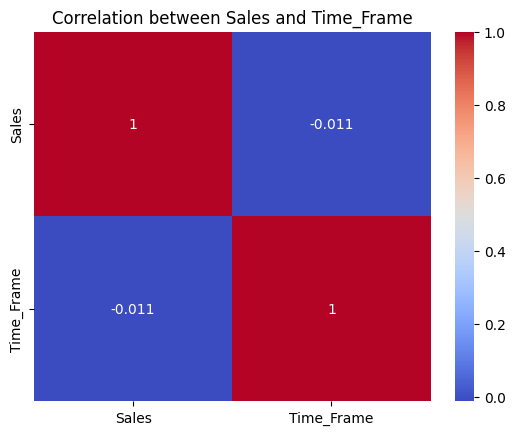

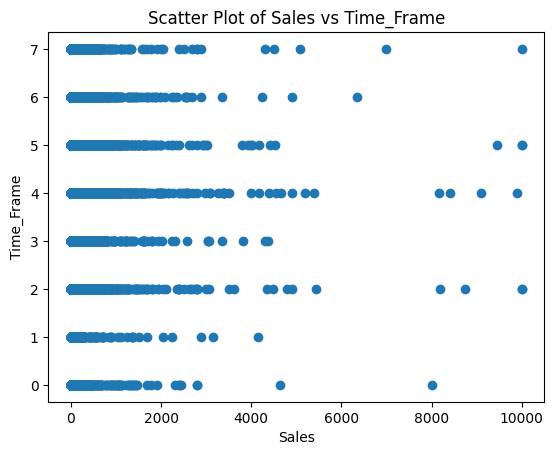

In [26]:
# Visualize the correlation using a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Sales and Time_Frame')
plt.show()

# Visualize the relationship using a scatter plot
plt.scatter(df['Sales'], df['Time_Frame'])
plt.xlabel('Sales')
plt.ylabel('Time_Frame')
plt.title('Scatter Plot of Sales vs Time_Frame')
plt.show()

In [30]:
# Calculate the correlation
correlation = df[['Profit', 'item_price']].corr()
correlation

,Profit,item_price
Profit,1.000000,0.190976
item_price,0.190976,1.000000


In [31]:
# Calculate the correlation
correlation = df[['Profit', 'Quantity']].corr()
correlation

,Profit,Quantity
Profit,1.000000,0.066253
Quantity,0.066253,1.000000


In [28]:
# Calculate the correlation
correlation = df[['Profit', 'Discount']].corr()
correlation

,Profit,Discount
Profit,1.000000,-0.219487
Discount,-0.219487,1.000000


In [32]:
# Calculate the correlation
correlation = df[['Profit', 'Ship_Mode_Rank']].corr()
correlation

,Profit,Ship_Mode_Rank
Profit,1.000000,-0.005767
Ship_Mode_Rank,-0.005767,1.000000


In [34]:
# Calculate the correlation
correlation = df[['Profit', 'Time_Frame']].corr()
correlation

,Profit,Time_Frame
Profit,1.000000,-0.004649
Time_Frame,-0.004649,1.000000


In [38]:
# Rename the 'Order_date _year' column for convenience
mydata2 = mydata2.rename(columns={'Order_date _year': 'Year'})

# Create features (X) and target (y) variables
X = mydata2[['Year']]
y_sales = mydata2['Sales']
y_profit = mydata2['Profit']

In [39]:
# Initialize the model
model_sales = LinearRegression()

# Fit the model
model_sales.fit(X, y_sales)

LinearRegression()

In [40]:
# Initialize the model
model_profit = LinearRegression()

# Fit the model
model_profit.fit(X, y_profit)


LinearRegression()

In [44]:
# Define the next three years
future_years = np.array([[2018], [2019], [2020]])

# Predict sales
predicted_sales = model_sales.predict(future_years)

# Predict profit
predicted_profit = model_profit.predict(future_years)



C:\Users\ramys\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\ramys\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


   Year  Predicted_Sales  Predicted_Profit
0  2018     792563.67185      109564.86970
1  2019     882452.88741      124751.11541
2  2020     972342.10297      139937.36112


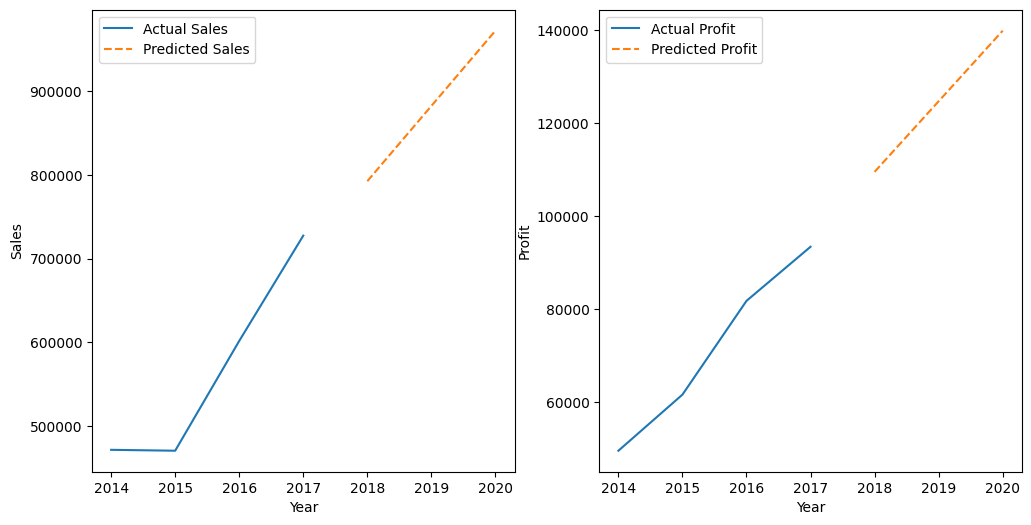

In [45]:
# Create a DataFrame for the forecast
forecast = pd.DataFrame({
    'Year': future_years.flatten(),
    'Predicted_Sales': predicted_sales,
    'Predicted_Profit': predicted_profit
})

print(forecast)

# Optionally, plot the forecast
plt.figure(figsize=(12, 6))

# Sales plot
plt.subplot(1, 2, 1)
plt.plot(mydata2['Year'], mydata2['Sales'], label='Actual Sales')
plt.plot(forecast['Year'], forecast['Predicted_Sales'], label='Predicted Sales', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()

# Profit plot
plt.subplot(1, 2, 2)
plt.plot(mydata2['Year'], mydata2['Profit'], label='Actual Profit')
plt.plot(forecast['Year'], forecast['Predicted_Profit'], label='Predicted Profit', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.legend()

plt.show()


In [47]:
# Assuming df is your DataFrame and it has columns 'Order_date _year', 'Region', 'Profit', and 'Sales'
# Group by 'Order_date _year' and 'Region' and calculate the sum of 'Profit'
sales_per_region_year = df.groupby(['Order_date _year', 'Region'])['Sales'].sum().reset_index()

# Sort the DataFrame by 'Profit' in descending order
sales_per_region_year = sales_per_region_year.sort_values(by='Sales', ascending=False)

# Display the result
print(sales_per_region_year)


    Order_date _year   Region        Sales
15              2017     West  246128.4054
13              2017     East  211382.9658
11              2016     West  187480.1765
9               2016     East  180685.8220
5               2015     East  156332.0570
3               2014     West  147883.0330
12              2017  Central  147098.1282
7               2015     West  139966.2495
8               2016  Central  139929.4259
1               2014     East  128680.4570
14              2017    South  122905.8575
0               2014  Central  103838.1646
4               2015  Central  102874.2220
10              2016    South   93610.2235
2               2014    South   91207.3634
6               2015    South   71359.9805


In [48]:
# Assuming df is your original DataFrame
# Group by 'Order_date _year' and 'Region' and calculate the sum of 'Sales'
sales_per_region_year = df.groupby(['Order_date _year', 'Region'])['Sales'].sum().reset_index()

# Pivot the DataFrame to get years as rows and regions as columns
pivot_table = sales_per_region_year.pivot(index='Order_date _year', columns='Region', values='Sales').fillna(0)

# Separate the years for features (X) and sales data (y)
X = np.array(pivot_table.index).reshape(-1, 1)


In [49]:
models = {}
predictions = {}

# Forecast for the next three years
future_years = np.array([[2018], [2019], [2020]])

# Train a model for each region
for region in pivot_table.columns:
    y = pivot_table[region].values
    model = LinearRegression()
    model.fit(X, y)
    models[region] = model
    predictions[region] = model.predict(future_years)


In [52]:
# Create a DataFrame for the forecast
forecast_data = {
    'Year': future_years.flatten()
}

for region, prediction in predictions.items():
    forecast_data[region] = prediction

forecast_df = pd.DataFrame(forecast_data)


   Year       Central          East         South          West
0  2018  165143.75885  237385.64830  124107.28755  265926.97715
1  2019  181827.26832  264631.77744  135841.86008  300151.98157
2  2020  198510.77779  291877.90658  147576.43261  334376.98599


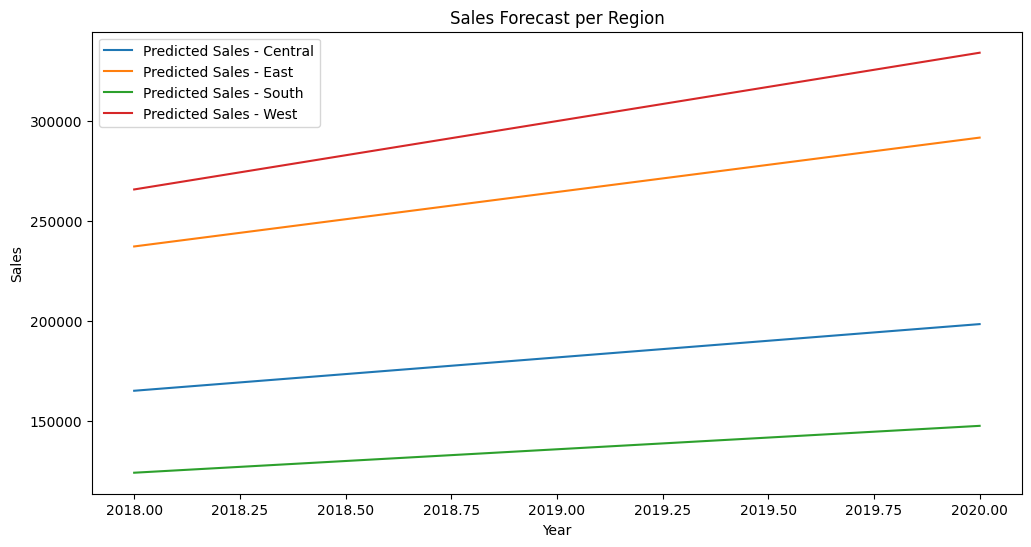

In [53]:
print(forecast_df)

# Optionally, plot the forecast
plt.figure(figsize=(12, 6))

for region in forecast_df.columns[1:]:
    plt.plot(forecast_df['Year'], forecast_df[region], label=f'Predicted Sales - {region}')

plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.title('Sales Forecast per Region')
plt.show()


In [46]:
# Assuming df is your DataFrame and it has columns 'Order_date _year', 'Region', 'Profit', and 'Sales'
# Group by 'Order_date _year' and 'Region' and calculate the sum of 'Profit'
profit_per_region_year = df.groupby(['Order_date _year', 'Region'])['Profit'].sum().reset_index()

# Sort the DataFrame by 'Profit' in descending order
profit_per_region_year = profit_per_region_year.sort_values(by='Profit', ascending=False)

# Display the result
print(profit_per_region_year)


    Order_date _year   Region      Profit
15              2017     West  43808.9561
13              2017     East  33230.5614
11              2016     West  24051.6069
5               2015     East  21091.0130
7               2015     West  20492.1947
9               2016     East  20141.5961
3               2014     West  20065.6912
8               2016  Central  19899.1629
10              2016    South  17702.8084
1               2014     East  17059.6095
2               2014    South  11879.1200
4               2015  Central  11716.8020
14              2017    South   8848.9079
6               2015    South   8318.5940
12              2017  Central   7550.8442
0               2014  Central    539.5534


In [3]:
# Assuming df is your original DataFrame
# Group by 'Order_date _year' and 'Region' and calculate the sum of 'Sales'
profit_per_region_year = df.groupby(['Order_date _year', 'Region'])['Profit'].sum().reset_index()

# Pivot the DataFrame to get years as rows and regions as columns
pivot_table = profit_per_region_year.pivot(index='Order_date _year', columns='Region', values='Profit').fillna(0)

# Separate the years for features (X) and sales data (y)
X = np.array(pivot_table.index).reshape(-1, 1)


In [4]:
models = {}
predictions = {}

# Forecast for the next three years
future_years = np.array([[2018], [2019], [2020]])

# Train a model for each region
for region in pivot_table.columns:
    y = pivot_table[region].values
    model = LinearRegression()
    model.fit(X, y)
    models[region] = model
    predictions[region] = model.predict(future_years)


In [5]:
# Create a DataFrame for the forecast
forecast_data = {
    'Year': future_years.flatten()
}

for region, prediction in predictions.items():
    forecast_data[region] = prediction

forecast_df = pd.DataFrame(forecast_data)


   Year      Central         East        South         West
0  2018  17230.64895  34771.55470  11760.75210  45801.91395
1  2019  20152.27228  39527.89858  11790.10991  53280.83464
2  2020  23073.89561  44284.24246  11819.46772  60759.75533


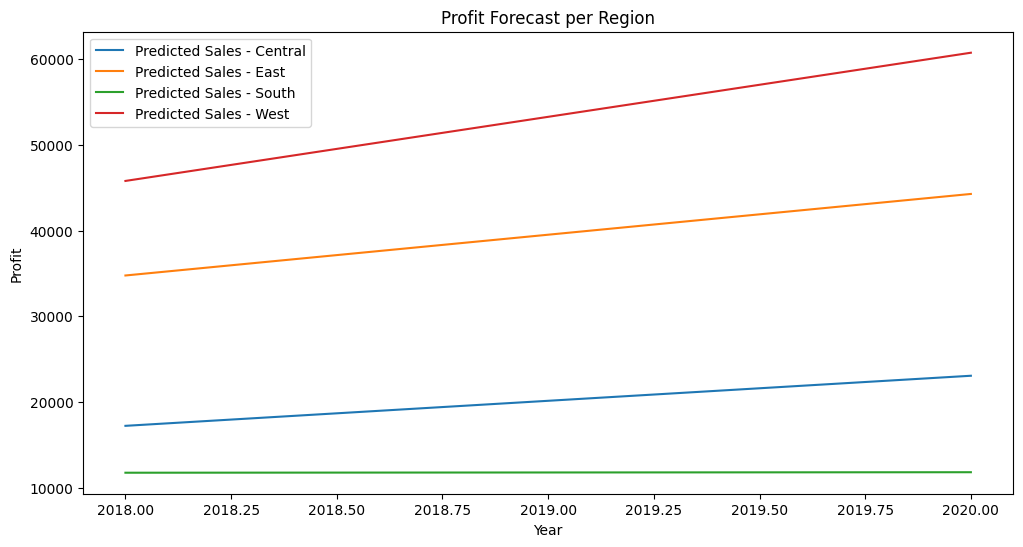

In [6]:
print(forecast_df)

# Optionally, plot the forecast
plt.figure(figsize=(12, 6))

for region in forecast_df.columns[1:]:
    plt.plot(forecast_df['Year'], forecast_df[region], label=f'Predicted Sales - {region}')

plt.xlabel('Year')
plt.ylabel('Profit')
plt.legend()
plt.title('Profit Forecast per Region')
plt.show()


In [14]:
# Assuming df is your DataFrame and it has columns 'Order_date _year', 'Region', 'Profit', and 'Sales'
# Group by 'Order_date _year' and 'Region' and calculate the sum of 'Profit'
sales_per_state_year = df.groupby(['Order_date _year', 'State'])['Sales'].sum().reset_index()

# Sort the DataFrame by 'Profit' in descending order
sales_per_state_year = sales_per_state_year.sort_values(by='Sales', ascending=False).head(10)

# Display the result
sales_per_state_year

,Order_date _year,State,Sales
137,2017,California,146388.3445
92,2016,California,131551.9115
163,2017,New York,92723.0269
3,2014,California,91303.5310
47,2015,California,88443.8445
74,2015,New York,80320.6870
118,2016,New York,71844.1020
29,2014,New York,64788.4870
178,2017,Washington,61539.9359
39,2014,Texas,50625.1766


In [15]:
# Assuming df is your original DataFrame and it has columns 'Order_date _year', 'State', and 'Sales'
# Group by 'Order_date _year' and 'State' and calculate the sum of 'Sales'
sales_per_state_year = df.groupby(['Order_date _year', 'State'])['Sales'].sum().reset_index()

# Sort and get the top 10 states by sales
top_states = sales_per_state_year.groupby('State')['Sales'].sum().nlargest(10).index

# Filter the DataFrame for these top states
filtered_sales = sales_per_state_year[sales_per_state_year['State'].isin(top_states)]


In [16]:
# Pivot the DataFrame to get years as rows and states as columns
pivot_table = filtered_sales.pivot(index='Order_date _year', columns='State', values='Sales').fillna(0)

# Separate the years for features (X) and sales data (y)
X = np.array(pivot_table.index).reshape(-1, 1)




In [18]:
# Create a DataFrame for the forecast
forecast_data = {
    'Year': future_years.flatten()
}

for state, prediction in predictions.items():
    forecast_data[state] = prediction

forecast_df = pd.DataFrame(forecast_data)

   Year    California      Florida    Illinois   Michigan      New York  \
0  2018  166512.53475  22441.46705  26767.1170  36457.541   96250.83440   
1  2019  187348.78550  23734.53108  29457.3537  43413.596  103783.53787   
2  2020  208185.03625  25027.59511  32147.5904  50369.651  111316.24134   

         Ohio  Pennsylvania        Texas  Virginia   Washington  
0  28571.4300    49098.5540  38952.24590  8044.700  56511.28990  
1  32174.1884    57086.7842  37514.33968  4198.908  65651.67487  
2  35776.9468    65075.0144  36076.43346   353.116  74792.05984  


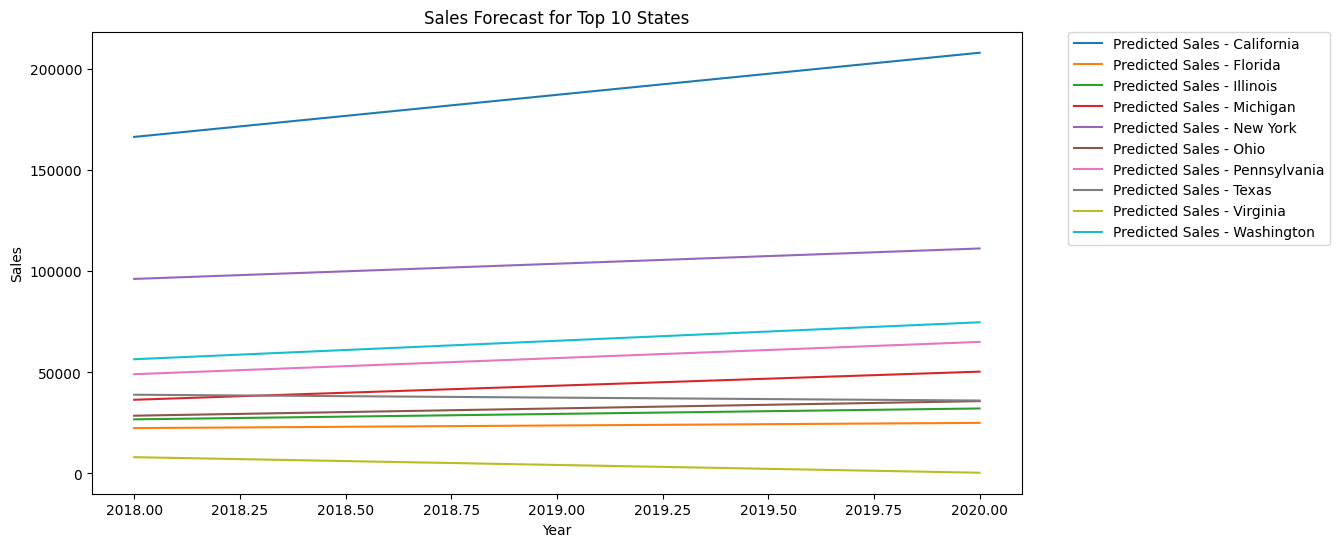

In [29]:
print(forecast_df)
plt.figure(figsize=(12, 6))

for state in forecast_df.columns[1:]:
    plt.plot(forecast_df['Year'], forecast_df[state], label=f'Predicted Sales - {state}')

plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.title('Sales Forecast for Top 10 States')

# Place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()



In [41]:
profit_per_state_year = df.groupby(['Order_date _year', 'State'])['Profit'].sum().reset_index()

# Sort the DataFrame by 'Profit' in descending order
profit_per_state_year = profit_per_state_year.sort_values(by='Profit', ascending=False).head(10)

# Display the result
profit_per_state_year

,Order_date _year,State,Profit
137,2017,California,29366.4589
163,2017,New York,24357.0717
92,2016,California,20005.7161
74,2015,New York,19277.5826
178,2017,Washington,17256.7798
118,2016,New York,16654.9495
47,2015,California,14371.2630
29,2014,New York,13748.9448
3,2014,California,12637.9491
101,2016,Indiana,10385.1339


In [42]:
# Assuming df is your original DataFrame and it has columns 'Order_date _year', 'State', and 'Profit'
# Group by 'Order_date _year' and 'State' and calculate the sum of 'Profit'
profit_per_state_year = df.groupby(['Order_date _year', 'State'])['Profit'].sum().reset_index()

# Sort and get the top 10 states by profit
top_states = profit_per_state_year.groupby('State')['Profit'].sum().nlargest(10).index

# Filter the DataFrame for these top states
filtered_profit = profit_per_state_year[profit_per_state_year['State'].isin(top_states)]


In [43]:
# Pivot the DataFrame to get years as rows and states as columns
pivot_table = filtered_profit.pivot(index='Order_date _year', columns='State', values='Profit').fillna(0)

# Separate the years for features (X) and profit data (y)
X = np.array(pivot_table.index).reshape(-1, 1)


In [45]:
models = {}
predictions = {}

# Forecast for the next three years
future_years = np.array([[2018], [2019], [2020]])

# Train a model for each state
for state in pivot_table.columns:
    y = pivot_table[state].values
    model = LinearRegression()
    model.fit(X, y)
    models[state] = model
    predictions[state] = model.predict(future_years)


In [46]:
# Create a DataFrame for the forecast
forecast_data = {
    'Year': future_years.flatten()
}

for state, prediction in predictions.items():
    forecast_data[state] = prediction

forecast_df = pd.DataFrame(forecast_data)


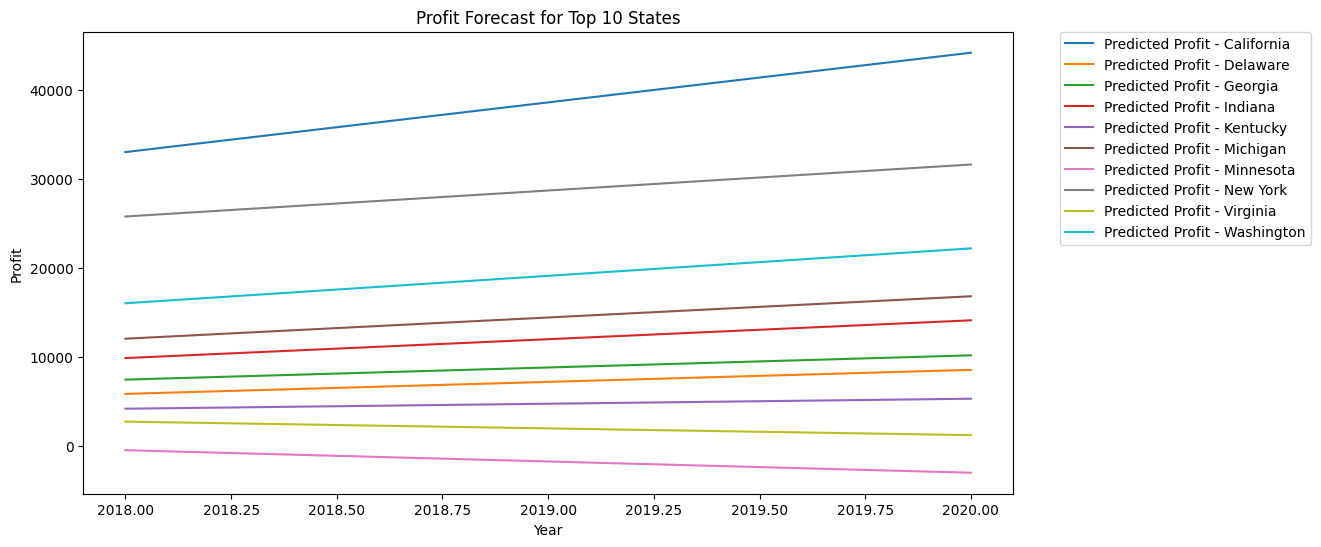

In [47]:
plt.figure(figsize=(12, 6))

for state in forecast_df.columns[1:]:
    plt.plot(forecast_df['Year'], forecast_df[state], label=f'Predicted Profit - {state}')

plt.xlabel('Year')
plt.ylabel('Profit')
plt.title('Profit Forecast for Top 10 States')

# Place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()


In [51]:
# Assuming df is your DataFrame and it has columns 'Order_date _year', 'Category', 'Profit', and 'Sales'
# Group by 'Order_date _year' and 'Category' and calculate the sum of 'Sales'
sales_per_cat_year = df.groupby(['Order_date _year', 'Category'])['Sales'].sum().reset_index()

# Sort the DataFrame by 'Sales' in descending order
sales_per_cat_year = sales_per_cat_year.sort_values(by='Sales', ascending=False)

# Display the result
sales_per_cat_year

,Order_date _year,Category,Sales
11,2017,Technology,266030.9127
10,2017,Office Supplies,246097.1750
8,2016,Technology,218864.2299
9,2017,Furniture,215387.2692
6,2016,Furniture,198901.4360
7,2016,Office Supplies,183939.9820
3,2015,Furniture,170518.2370
5,2015,Technology,162780.8090
2,2014,Technology,162639.7529
0,2014,Furniture,157192.8531


In [52]:
# Assuming df is your original DataFrame and it has columns 'Order_date _year', 'Category', and 'Sales'
# Group by 'Order_date _year' and 'Category' and calculate the sum of 'Sales'
sales_per_cat_year = df.groupby(['Order_date _year', 'Category'])['Sales'].sum().reset_index()

# Pivot the DataFrame to get years as rows and categories as columns
pivot_table = sales_per_cat_year.pivot(index='Order_date _year', columns='Category', values='Sales').fillna(0)

# Separate the years for features (X) and sales data (y)
X = np.array(pivot_table.index).reshape(-1, 1)


In [53]:
models = {}
predictions = {}

# Forecast for the next three years
future_years = np.array([[2018], [2019], [2020]])

# Train a model for each category
for category in pivot_table.columns:
    y = pivot_table[category].values
    model = LinearRegression()
    model.fit(X, y)
    models[category] = model
    predictions[category] = model.predict(future_years)


In [57]:
models = {}
predictions = {}

# Forecast for the next three years
future_years = np.array([[2018], [2019], [2020]])

# Train a model for each category
for category in pivot_table.columns:
    y = pivot_table[category].values
    model = LinearRegression()
    model.fit(X, y)
    models[category] = model
    predictions[category] = model.predict(future_years)


In [56]:
# Create a DataFrame for the forecast
forecast_data = {
    'Year': future_years.flatten()
}

for category, prediction in predictions.items():
    forecast_data[category] = prediction

forecast_df = pd.DataFrame(forecast_data)


   Year     Furniture  Office Supplies    Technology
0  2018  236241.56065      262178.9600  294143.15120
1  2019  256538.20538      295145.8408  330768.84123
2  2020  276834.85011      328112.7216  367394.53126


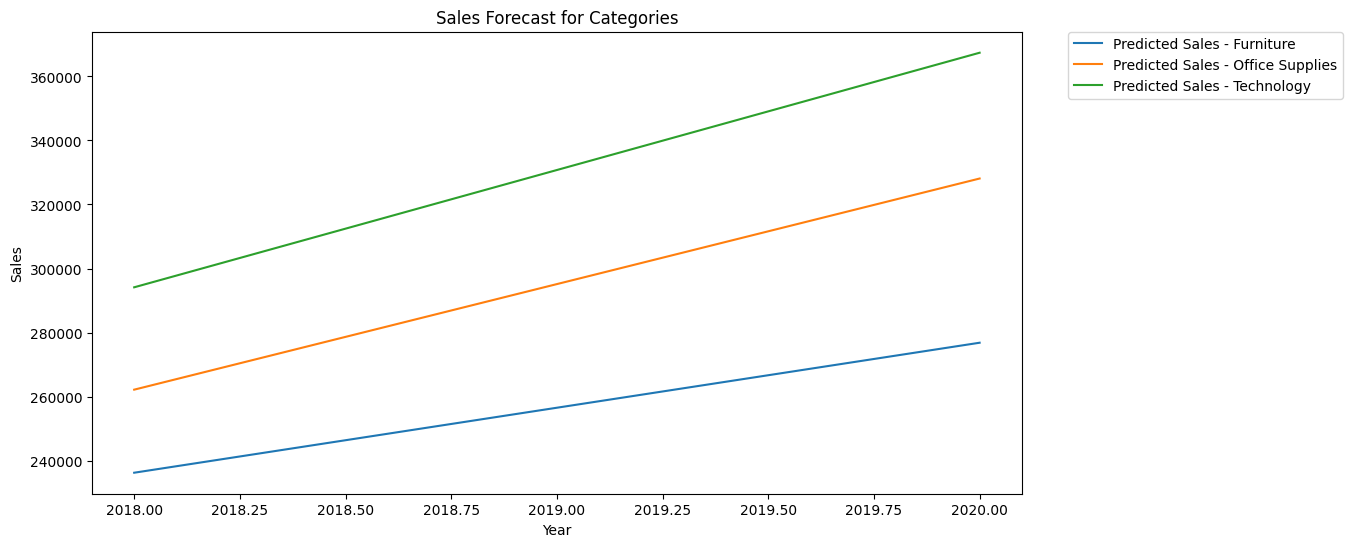

In [59]:
print(forecast_df)
plt.figure(figsize=(12, 6))

for category in forecast_df.columns[1:]:
    plt.plot(forecast_df['Year'], forecast_df[category], label=f'Predicted Sales - {category}')

plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales Forecast for Categories')

# Place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()


In [61]:
# Assuming df is your DataFrame and it has columns 'Order_date _year', 'sub-Category', 'Profit', and 'Sales'
# Group by 'Order_date _year' and 'sub-Category' and calculate the sum of 'Sales'
sales_per_subcat_year = df.groupby(['Order_date _year', 'Sub_Category'])['Sales'].sum().reset_index()

# Sort the DataFrame by 'Sales' in descending order
sales_per_subcat_year = sales_per_subcat_year.sort_values(by='Sales', ascending=False)

# Display the result
sales_per_subcat_year

,Order_date _year,Sub_Category,Sales
64,2017,Phones,105340.516
56,2017,Chairs,95554.353
39,2016,Chairs,83918.645
47,2016,Phones,78962.030
13,2014,Phones,77390.806
...,...,...,...
32,2015,Supplies,1952.482
42,2016,Fasteners,960.134
59,2017,Fasteners,857.594
8,2014,Fasteners,661.328


In [62]:
# Assuming df is your original DataFrame and it has columns 'Order_date _year', 'Sub_Category', and 'Sales'
# Group by 'Order_date _year' and 'Sub_Category' and calculate the sum of 'Sales'
sales_per_subcat_year = df.groupby(['Order_date _year', 'Sub_Category'])['Sales'].sum().reset_index()

# Pivot the DataFrame to get years as rows and sub-categories as columns
pivot_table = sales_per_subcat_year.pivot(index='Order_date _year', columns='Sub_Category', values='Sales').fillna(0)

# Separate the years for features (X) and sales data (y)
X = np.array(pivot_table.index).reshape(-1, 1)


In [63]:
models = {}
predictions = {}

# Forecast for the next three years
future_years = np.array([[2018], [2019], [2020]])

# Train a model for each sub-category
for sub_category in pivot_table.columns:
    y = pivot_table[sub_category].values
    model = LinearRegression()
    model.fit(X, y)
    models[sub_category] = model
    predictions[sub_category] = model.predict(future_years)


In [64]:
# Create a DataFrame for the forecast
forecast_data = {
    'Year': future_years.flatten()
}

for sub_category, prediction in predictions.items():
    forecast_data[sub_category] = prediction

forecast_df = pd.DataFrame(forecast_data)


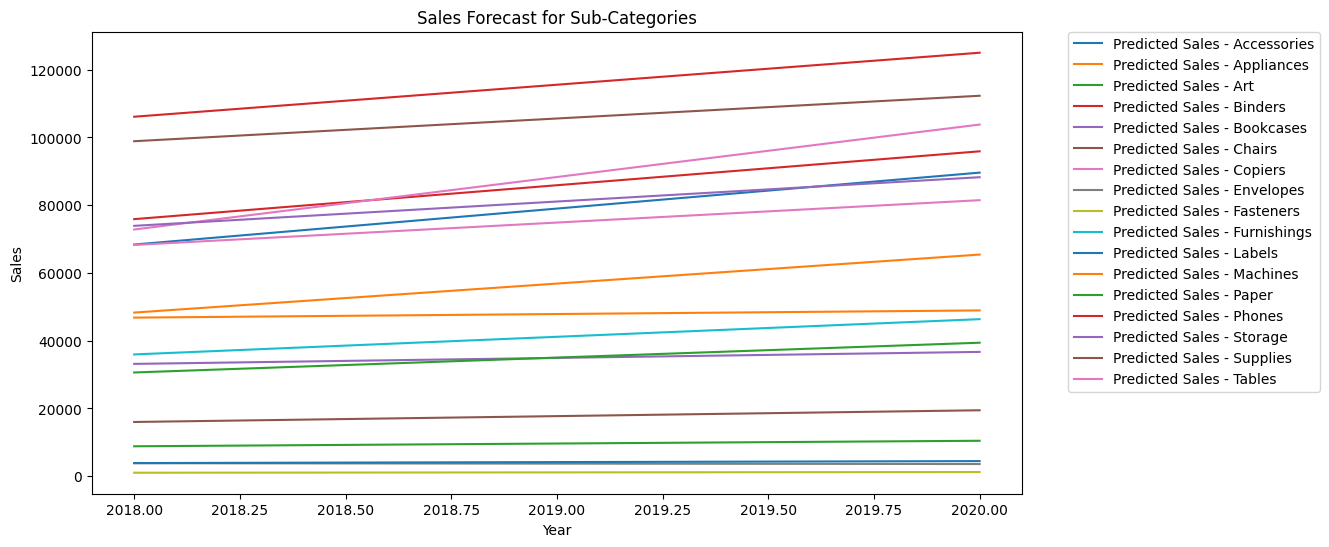

In [65]:
plt.figure(figsize=(12, 6))

for sub_category in forecast_df.columns[1:]:
    plt.plot(forecast_df['Year'], forecast_df[sub_category], label=f'Predicted Sales - {sub_category}')

plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales Forecast for Sub-Categories')

# Place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()
